In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings(action="ignore")
#import featuretools as ft

In [377]:
raw_data1 = pd.read_excel("./Data_Train.xlsx")
test_data = pd.read_excel("./Data_Test.xlsx")
raw_data1['source'] = 'train'
test_data['source'] = 'test'
raw_data = pd.concat([raw_data1,test_data],ignore_index=True)

In [378]:
raw_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 10 columns):
CITY             16774 non-null object
COST             12690 non-null float64
CUISINES         16921 non-null object
LOCALITY         16793 non-null object
RATING           16917 non-null object
RESTAURANT_ID    16921 non-null int64
TIME             16921 non-null object
TITLE            16921 non-null object
VOTES            15315 non-null object
source           16921 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 10.0 MB


In [379]:
raw_data.columns

Index(['CITY', 'COST', 'CUISINES', 'LOCALITY', 'RATING', 'RESTAURANT_ID',
       'TIME', 'TITLE', 'VOTES', 'source'],
      dtype='object')

In [380]:
raw_data.head(5)
raw_data = raw_data[['CITY', 'CUISINES', 'LOCALITY', 'RATING',
       'TIME', 'TITLE', 'VOTES', 'source', 'COST']]

In [381]:
print("The train shape is", raw_data1.shape)
print("The test shape is", test_data.shape)

The train shape is (12690, 10)
The test shape is (4231, 9)


In [382]:
raw_data.isnull().sum()

CITY         147
CUISINES       0
LOCALITY     128
RATING         4
TIME           0
TITLE          0
VOTES       1606
source         0
COST        4231
dtype: int64

In [383]:
#raw_data.drop(['RESTAURANT_ID'],inplace=True,axis=1)

In [384]:
raw_data.isnull().sum()

CITY         147
CUISINES       0
LOCALITY     128
RATING         4
TIME           0
TITLE          0
VOTES       1606
source         0
COST        4231
dtype: int64

In [385]:
raw_data.head(5)

,CITY,CUISINES,LOCALITY,RATING,TIME,TITLE,VOTES,source,COST
0,Thane,"Malwani, Goan, North Indian",Dombivali East,3.6,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49 votes,train,1200.0
1,Chennai,"Asian, Modern Indian, Japanese",Ramapuram,4.2,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30 votes,train,1500.0
2,Chennai,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221 votes,train,800.0
3,Mumbai,"Tibetan, Chinese",Bandra West,4.1,11:30am – 1am (Mon-Sun),QUICK BITES,24 votes,train,800.0
4,Mumbai,Desserts,Lower Parel,3.8,11am – 1am (Mon-Sun),DESSERT PARLOR,165 votes,train,300.0


In [386]:
raw_data.dtypes

CITY         object
CUISINES     object
LOCALITY     object
RATING       object
TIME         object
TITLE        object
VOTES        object
source       object
COST        float64
dtype: object

In [387]:
def unique_counts(df,features,p=False):
    for i in features:
        if p:
         print("The number of unique values for",i, df[i].value_counts())
         print("The number of unique values for",i, len(df[i].value_counts()))
         print("-"*100)
        else :
            print("The number of unique values for",i, len(df[i].value_counts()))
            print("-"*100)

In [388]:
ft = ['CITY','CUISINES','LOCALITY','TITLE',]
unique_counts(raw_data,ft)

The number of unique values for CITY 450
----------------------------------------------------------------------------------------------------
The number of unique values for CUISINES 5183
----------------------------------------------------------------------------------------------------
The number of unique values for LOCALITY 1636
----------------------------------------------------------------------------------------------------
The number of unique values for TITLE 123
----------------------------------------------------------------------------------------------------


In [389]:
raw_data['CITY'].fillna('NA', inplace=True)
raw_data['LOCALITY'].fillna('XXX', inplace=True)
raw_data['RATING'].fillna(0, inplace=True)
raw_data['VOTES'].fillna("0 votes",inplace=True)

In [390]:
def comma_seprated_categories(df, col):
    cols = list(df[col])
    max = 1
    for i in cols:
        if len(i.split(',')) > max:
            max = len(i.split(','))
    print("Max number of",col,"in a cell",max)
    
    all_cats = []
    for i in cols :
     if len(i.split(',')) == 1:
         all_cats.append(i.split(',')[0].strip().upper())
     else :
        for it in range(len(i.split(','))):
            all_cats.append(i.split(',')[it].strip().upper())
    print("\n\nNumber of Unique",col,": ", len(pd.Series(all_cats).unique()))
    print("\n\nUnique",col,":\n", pd.Series(all_cats).unique()) 
    return list(pd.Series(all_cats).unique())

In [391]:
all_titles = comma_seprated_categories(raw_data,col='TITLE')
all_cuisines =comma_seprated_categories(raw_data,col='CUISINES')

Max number of TITLE in a cell 2


Number of Unique TITLE :  25


Unique TITLE :
 ['CASUAL DINING' 'BAR' 'QUICK BITES' 'DESSERT PARLOR' 'CAFÉ'
 'MICROBREWERY' 'BEVERAGE SHOP' 'IRANI CAFE' 'BAKERY' 'NONE' 'PUB'
 'FINE DINING' 'SWEET SHOP' 'LOUNGE' 'FOOD COURT' 'FOOD TRUCK' 'MESS'
 'KIOSK' 'CLUB' 'CONFECTIONERY' 'DHABA' 'MEAT SHOP' 'COCKTAIL BAR'
 'PAAN SHOP' 'BHOJANALYA']
Max number of CUISINES in a cell 8


Number of Unique CUISINES :  130


Unique CUISINES :
 ['MALWANI' 'GOAN' 'NORTH INDIAN' 'ASIAN' 'MODERN INDIAN' 'JAPANESE'
 'CHINESE' 'BIRYANI' 'HYDERABADI' 'TIBETAN' 'DESSERTS' 'SEAFOOD' 'CAFE'
 'PIZZA' 'BURGER' 'BAR FOOD' 'SOUTH INDIAN' 'FAST FOOD' 'BEVERAGES'
 'ARABIAN' 'MUGHLAI' 'MAHARASHTRIAN' 'PARSI' 'THAI' 'BAKERY' 'MOMOS'
 'CONTINENTAL' 'EUROPEAN' 'ROLLS' 'ANDHRA' 'ITALIAN' 'BBQ' 'FINGER FOOD'
 'TEA' 'AMERICAN' 'HEALTHY FOOD' 'COFFEE' 'INDONESIAN' 'KOREAN' 'NEPALESE'
 'ICE CREAM' 'MEXICAN' 'KERALA' 'INDIAN' 'MITHAI' 'STREET FOOD'
 'MALAYSIAN' 'VIETNAMESE' 'IRANIAN' 'KEBAB' 'JU

In [392]:
raw_data.isnull().sum()

CITY           0
CUISINES       0
LOCALITY       0
RATING         0
TIME           0
TITLE          0
VOTES          0
source         0
COST        4231
dtype: int64

In [393]:
#comma_seprated_categories(raw_data,col='TITLE')
comma_seprated_categories(raw_data,col='CUISINES')

Max number of CUISINES in a cell 8


Number of Unique CUISINES :  130


Unique CUISINES :
 ['MALWANI' 'GOAN' 'NORTH INDIAN' 'ASIAN' 'MODERN INDIAN' 'JAPANESE'
 'CHINESE' 'BIRYANI' 'HYDERABADI' 'TIBETAN' 'DESSERTS' 'SEAFOOD' 'CAFE'
 'PIZZA' 'BURGER' 'BAR FOOD' 'SOUTH INDIAN' 'FAST FOOD' 'BEVERAGES'
 'ARABIAN' 'MUGHLAI' 'MAHARASHTRIAN' 'PARSI' 'THAI' 'BAKERY' 'MOMOS'
 'CONTINENTAL' 'EUROPEAN' 'ROLLS' 'ANDHRA' 'ITALIAN' 'BBQ' 'FINGER FOOD'
 'TEA' 'AMERICAN' 'HEALTHY FOOD' 'COFFEE' 'INDONESIAN' 'KOREAN' 'NEPALESE'
 'ICE CREAM' 'MEXICAN' 'KERALA' 'INDIAN' 'MITHAI' 'STREET FOOD'
 'MALAYSIAN' 'VIETNAMESE' 'IRANIAN' 'KEBAB' 'JUICES' 'SANDWICH'
 'MEDITERRANEAN' 'SALAD' 'GUJARATI' 'RAJASTHANI' 'TEX-MEX' 'ROAST CHICKEN'
 'BURMESE' 'CHETTINAD' 'NORTH EASTERN' 'LEBANESE' 'COFFEE AND TEA' 'GRILL'
 '' 'BIHARI' 'BENGALI' 'LUCKNOWI' 'AWADHI' 'STEAK' 'FRENCH' 'PORTUGUESE'
 'WRAPS' 'SRI LANKAN' 'ORIYA' 'ETHIOPIAN' 'KONKAN' 'SUSHI' 'SPANISH'
 'RUSSIAN' 'MANGALOREAN' 'TURKISH' 'BUBBLE TEA' 'AFGHAN' 'NAGA'


['MALWANI',
 'GOAN',
 'NORTH INDIAN',
 'ASIAN',
 'MODERN INDIAN',
 'JAPANESE',
 'CHINESE',
 'BIRYANI',
 'HYDERABADI',
 'TIBETAN',
 'DESSERTS',
 'SEAFOOD',
 'CAFE',
 'PIZZA',
 'BURGER',
 'BAR FOOD',
 'SOUTH INDIAN',
 'FAST FOOD',
 'BEVERAGES',
 'ARABIAN',
 'MUGHLAI',
 'MAHARASHTRIAN',
 'PARSI',
 'THAI',
 'BAKERY',
 'MOMOS',
 'CONTINENTAL',
 'EUROPEAN',
 'ROLLS',
 'ANDHRA',
 'ITALIAN',
 'BBQ',
 'FINGER FOOD',
 'TEA',
 'AMERICAN',
 'HEALTHY FOOD',
 'COFFEE',
 'INDONESIAN',
 'KOREAN',
 'NEPALESE',
 'ICE CREAM',
 'MEXICAN',
 'KERALA',
 'INDIAN',
 'MITHAI',
 'STREET FOOD',
 'MALAYSIAN',
 'VIETNAMESE',
 'IRANIAN',
 'KEBAB',
 'JUICES',
 'SANDWICH',
 'MEDITERRANEAN',
 'SALAD',
 'GUJARATI',
 'RAJASTHANI',
 'TEX-MEX',
 'ROAST CHICKEN',
 'BURMESE',
 'CHETTINAD',
 'NORTH EASTERN',
 'LEBANESE',
 'COFFEE AND TEA',
 'GRILL',
 '',
 'BIHARI',
 'BENGALI',
 'LUCKNOWI',
 'AWADHI',
 'STEAK',
 'FRENCH',
 'PORTUGUESE',
 'WRAPS',
 'SRI LANKAN',
 'ORIYA',
 'ETHIOPIAN',
 'KONKAN',
 'SUSHI',
 'SPANISH',
 'RUSSIAN

In [394]:
raw_data[raw_data['source']=='train']['COST'].describe()

count    12690.000000
mean       655.252246
std        627.003540
min         20.000000
25%        300.000000
50%        500.000000
75%        800.000000
max      14000.000000
Name: COST, dtype: float64

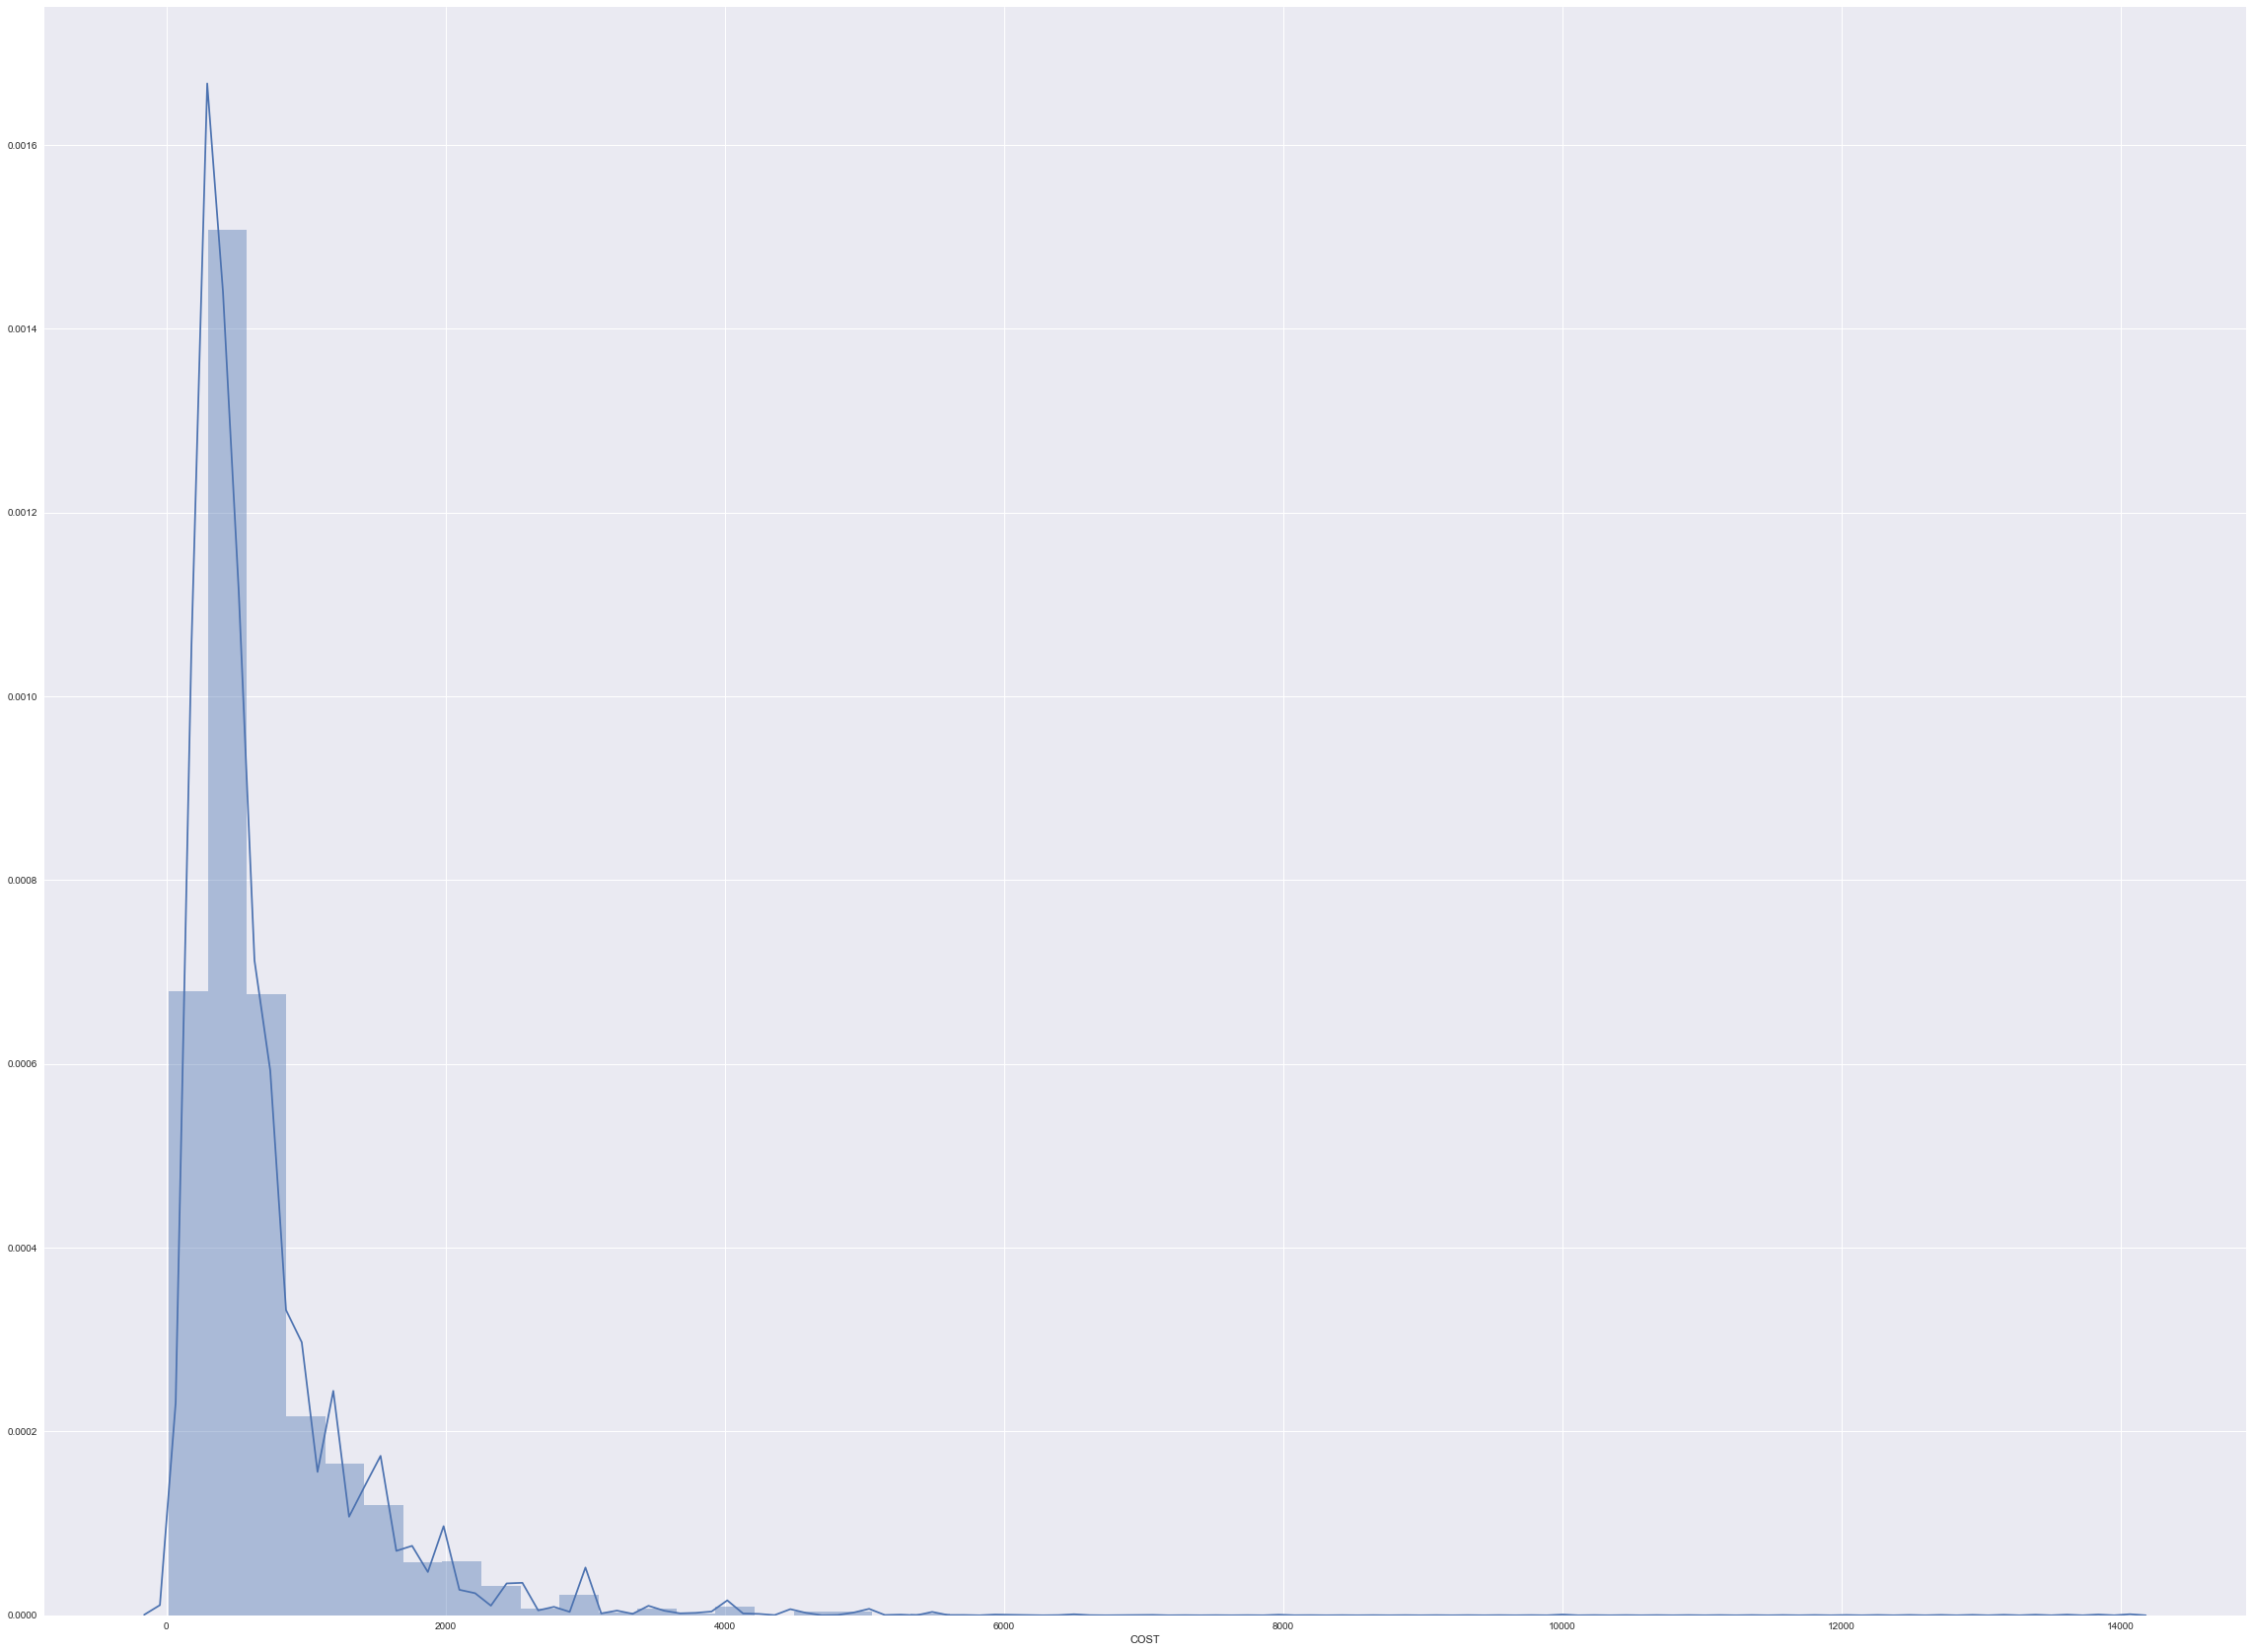

In [395]:
sns.distplot((raw_data[raw_data['source']=='train']['COST']))
plt.show()

In [396]:
np.log(raw_data[raw_data['source']=='train']['COST']).describe()

count    12690.000000
mean         6.198871
std          0.722648
min          2.995732
25%          5.703782
50%          6.214608
75%          6.684612
max          9.546813
Name: COST, dtype: float64

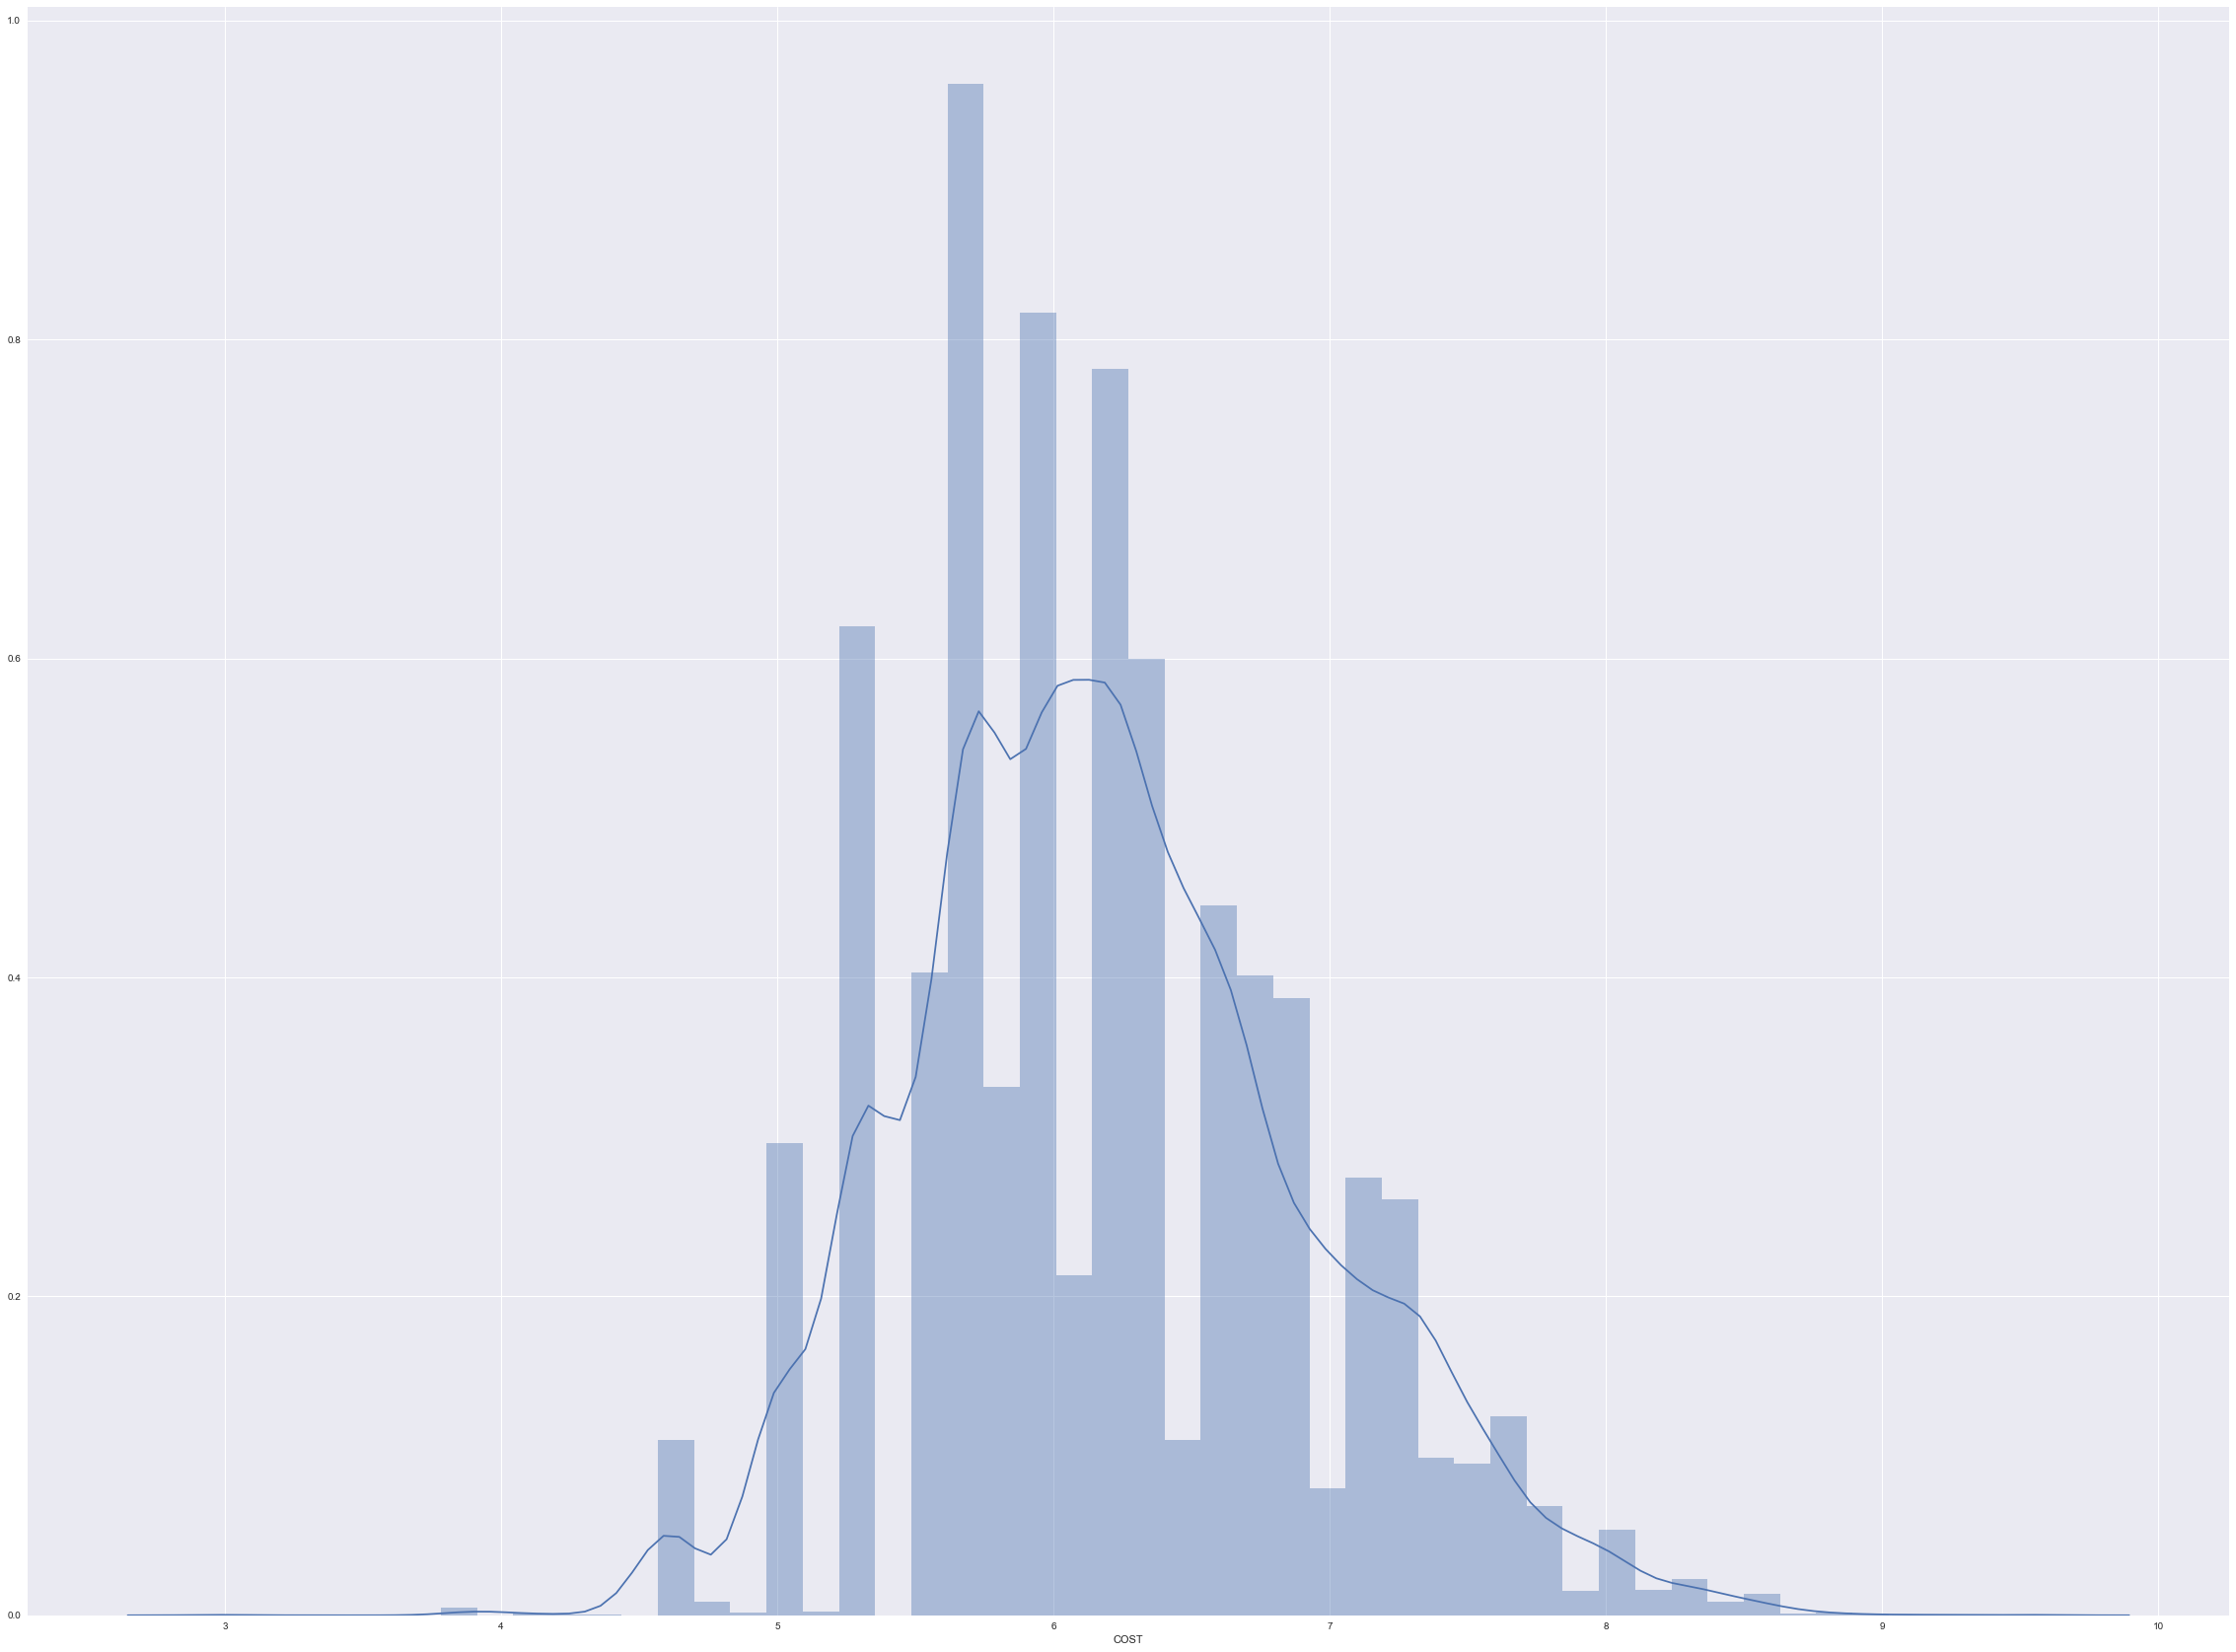

In [397]:
sns.distplot(np.log(raw_data[raw_data['source']=='train']['COST']))
plt.show()

In [398]:
print(len(raw_data['CITY'].str.split(" ",expand = True)[0].value_counts()))
print(len(raw_data['CITY'].value_counts()))

294
451


In [399]:
raw_data['CUISINES'].str.split(",",expand = True).head(5)
# Max 8 cusines in any given row

,0,1,2,3,4,5,6,7
0,Malwani,Goan,North Indian,None,None,None,None,None
1,Asian,Modern Indian,Japanese,None,None,None,None,None
2,North Indian,Chinese,Biryani,Hyderabadi,None,None,None,None
3,Tibetan,Chinese,None,None,None,None,None,None
4,Desserts,None,None,None,None,None,None,None


In [400]:
len(raw_data['TITLE'].unique())

123

In [401]:
raw_data['TITLE_1'] = raw_data['TITLE'].str.split(",",expand = True)[0]
raw_data['TITLE_2'] = raw_data['TITLE'].str.split(",",expand = True)[1]

In [402]:
raw_data.drop(['TITLE'],inplace=True,axis=1)

In [403]:
raw_data.head(5)

,CITY,CUISINES,LOCALITY,RATING,TIME,VOTES,source,COST,TITLE_1,TITLE_2
0,Thane,"Malwani, Goan, North Indian",Dombivali East,3.6,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",49 votes,train,1200.0,CASUAL DINING,None
1,Chennai,"Asian, Modern Indian, Japanese",Ramapuram,4.2,6pm – 11pm (Mon-Sun),30 votes,train,1500.0,CASUAL DINING,BAR
2,Chennai,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",221 votes,train,800.0,CASUAL DINING,None
3,Mumbai,"Tibetan, Chinese",Bandra West,4.1,11:30am – 1am (Mon-Sun),24 votes,train,800.0,QUICK BITES,None
4,Mumbai,Desserts,Lower Parel,3.8,11am – 1am (Mon-Sun),165 votes,train,300.0,DESSERT PARLOR,None


In [404]:
len( raw_data['LOCALITY'].str.split(" ",expand = True)[0].unique())

1036

In [405]:
def mapping(df,col,n=25):
 print(col,n)
 vc = df[col].value_counts()
 replacements = {}
 for col, s in vc.items():
    if s[s<n].any():
        replacements[col] = 'other'
 return replacements

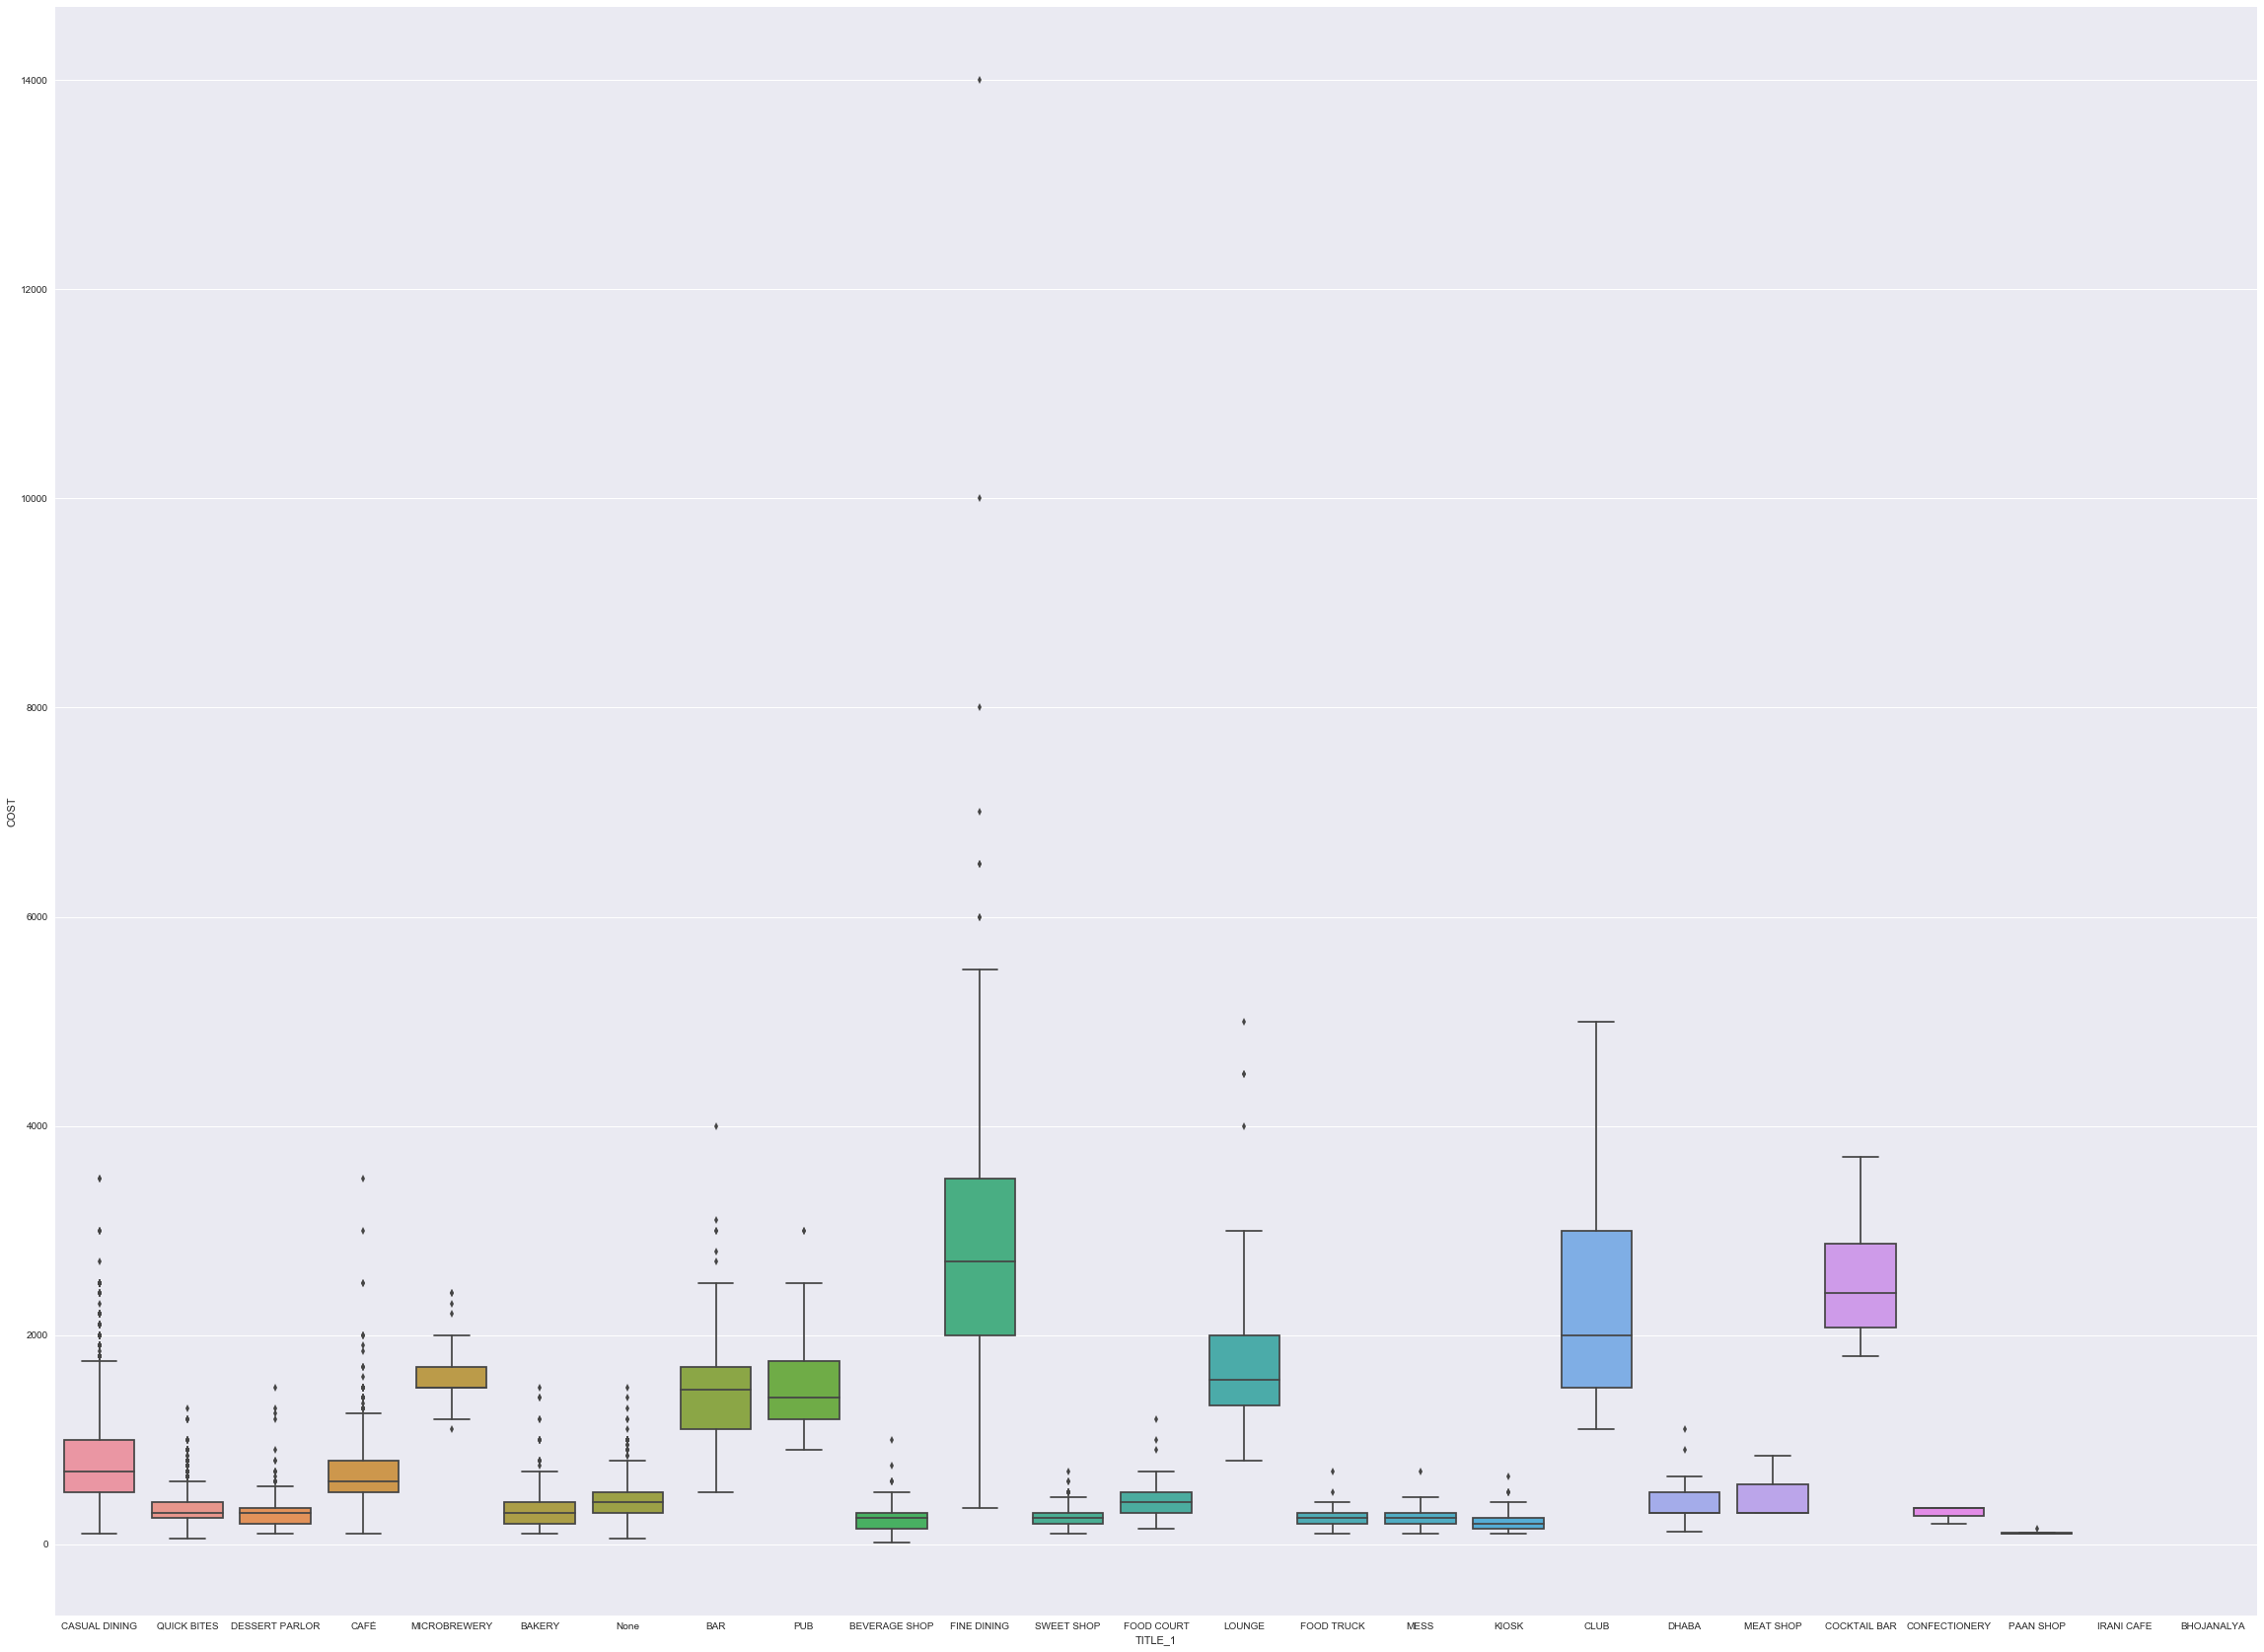

In [406]:
sns.boxplot(x='TITLE_1',y='COST', data=raw_data)
sns.set(rc={'figure.figsize':(40,30)})
sns.set(font_scale=1)   
plt.show()

In [407]:
raw_data.isnull().sum()

CITY            0
CUISINES        0
LOCALITY        0
RATING          0
TIME            0
VOTES           0
source          0
COST         4231
TITLE_1         0
TITLE_2     14977
dtype: int64

In [408]:
raw_data['TITLE_2'].fillna("None", inplace=True)

In [409]:
raw_data.isnull().sum()

CITY           0
CUISINES       0
LOCALITY       0
RATING         0
TIME           0
VOTES          0
source         0
COST        4231
TITLE_1        0
TITLE_2        0
dtype: int64

In [410]:
raw_data['CUISINES_1'] = raw_data['CUISINES'].str.split(",",expand = True)[0]
raw_data['CUISINES_2'] = raw_data['CUISINES'].str.split(",",expand = True)[1]
raw_data['CUISINES_3'] = raw_data['CUISINES'].str.split(",",expand = True)[2]
raw_data['CUISINES_4'] = raw_data['CUISINES'].str.split(",",expand = True)[3]
raw_data['CUISINES_5'] = raw_data['CUISINES'].str.split(",",expand = True)[4]
raw_data['CUISINES_6'] = raw_data['CUISINES'].str.split(",",expand = True)[5]
raw_data['CUISINES_7'] = raw_data['CUISINES'].str.split(",",expand = True)[6]
raw_data['CUISINES_8'] = raw_data['CUISINES'].str.split(",",expand = True)[7]

In [411]:
raw_data.isnull().sum()

CITY              0
CUISINES          0
LOCALITY          0
RATING            0
TIME              0
VOTES             0
source            0
COST           4231
TITLE_1           0
TITLE_2           0
CUISINES_1        0
CUISINES_2     4047
CUISINES_3     9330
CUISINES_4    13309
CUISINES_5    15550
CUISINES_6    16370
CUISINES_7    16671
CUISINES_8    16813
dtype: int64

In [412]:
cus_list = []
for i in range(1,9):
    i = str(i)
    cus_list.append("CUISINES_"+i)
    

In [413]:
for i in cus_list:
    raw_data[i].fillna("NAA", inplace=True)
all_cuisines.append("NAA")

In [414]:
raw_data.isnull().sum()

CITY             0
CUISINES         0
LOCALITY         0
RATING           0
TIME             0
VOTES            0
source           0
COST          4231
TITLE_1          0
TITLE_2          0
CUISINES_1       0
CUISINES_2       0
CUISINES_3       0
CUISINES_4       0
CUISINES_5       0
CUISINES_6       0
CUISINES_7       0
CUISINES_8       0
dtype: int64

In [415]:
raw_data.dtypes

CITY           object
CUISINES       object
LOCALITY       object
RATING         object
TIME           object
VOTES          object
source         object
COST          float64
TITLE_1        object
TITLE_2        object
CUISINES_1     object
CUISINES_2     object
CUISINES_3     object
CUISINES_4     object
CUISINES_5     object
CUISINES_6     object
CUISINES_7     object
CUISINES_8     object
dtype: object

In [416]:
raw_data['VOTES'] = raw_data['VOTES'].str.split(" ", expand=True)[0]
raw_data['VOTES']  = pd.to_numeric(raw_data['VOTES'])

In [417]:
raw_data.dtypes

CITY           object
CUISINES       object
LOCALITY       object
RATING         object
TIME           object
VOTES           int64
source         object
COST          float64
TITLE_1        object
TITLE_2        object
CUISINES_1     object
CUISINES_2     object
CUISINES_3     object
CUISINES_4     object
CUISINES_5     object
CUISINES_6     object
CUISINES_7     object
CUISINES_8     object
dtype: object

In [418]:
rates = list(raw_data['RATING'])

for i in range(len(rates)) :
    try:
       rates[i] = float(rates[i])
    except :
       rates[i] = np.nan

In [419]:
raw_data['RATING'] = rates

In [420]:
raw_data.isnull().sum()

CITY             0
CUISINES         0
LOCALITY         0
RATING        1602
TIME             0
VOTES            0
source           0
COST          4231
TITLE_1          0
TITLE_2          0
CUISINES_1       0
CUISINES_2       0
CUISINES_3       0
CUISINES_4       0
CUISINES_5       0
CUISINES_6       0
CUISINES_7       0
CUISINES_8       0
dtype: int64

In [421]:
raw_data['RATING'].fillna(0.0,inplace=True)

In [422]:
raw_data.isnull().sum()

CITY             0
CUISINES         0
LOCALITY         0
RATING           0
TIME             0
VOTES            0
source           0
COST          4231
TITLE_1          0
TITLE_2          0
CUISINES_1       0
CUISINES_2       0
CUISINES_3       0
CUISINES_4       0
CUISINES_5       0
CUISINES_6       0
CUISINES_7       0
CUISINES_8       0
dtype: int64

In [423]:
raw_data.dtypes

CITY           object
CUISINES       object
LOCALITY       object
RATING        float64
TIME           object
VOTES           int64
source         object
COST          float64
TITLE_1        object
TITLE_2        object
CUISINES_1     object
CUISINES_2     object
CUISINES_3     object
CUISINES_4     object
CUISINES_5     object
CUISINES_6     object
CUISINES_7     object
CUISINES_8     object
dtype: object

In [424]:
raw_data.drop(['TIME'], inplace=True,axis=1)

In [425]:
raw_data.drop(['CUISINES'], inplace=True,axis=1)

In [426]:
raw_data.columns

Index(['CITY', 'LOCALITY', 'RATING', 'VOTES', 'source', 'COST', 'TITLE_1',
       'TITLE_2', 'CUISINES_1', 'CUISINES_2', 'CUISINES_3', 'CUISINES_4',
       'CUISINES_5', 'CUISINES_6', 'CUISINES_7', 'CUISINES_8'],
      dtype='object')

In [427]:
raw_data = raw_data[['CITY', 'LOCALITY', 'RATING', 'VOTES', 'source', 'TITLE_1',
       'TITLE_2', 'CUISINES_1', 'CUISINES_2', 'CUISINES_3', 'CUISINES_4',
       'CUISINES_5', 'CUISINES_6', 'CUISINES_7', 'CUISINES_8','COST']]

In [428]:
raw_data.head(10)

,CITY,LOCALITY,RATING,VOTES,source,TITLE_1,TITLE_2,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,CUISINES_5,CUISINES_6,CUISINES_7,CUISINES_8,COST
0,Thane,Dombivali East,3.6,49,train,CASUAL DINING,None,Malwani,Goan,North Indian,NAA,NAA,NAA,NAA,NAA,1200.0
1,Chennai,Ramapuram,4.2,30,train,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,NAA,NAA,NAA,NAA,NAA,1500.0
2,Chennai,Saligramam,3.8,221,train,CASUAL DINING,None,North Indian,Chinese,Biryani,Hyderabadi,NAA,NAA,NAA,NAA,800.0
3,Mumbai,Bandra West,4.1,24,train,QUICK BITES,None,Tibetan,Chinese,NAA,NAA,NAA,NAA,NAA,NAA,800.0
4,Mumbai,Lower Parel,3.8,165,train,DESSERT PARLOR,None,Desserts,NAA,NAA,NAA,NAA,NAA,NAA,NAA,300.0
5,Mumbai,Vile Parle West,4.0,550,train,CASUAL DINING,None,North Indian,Chinese,Seafood,Biryani,NAA,NAA,NAA,NAA,800.0
6,Bangalore,Koramangala 6th Block,4.1,509,train,CAFÉ,None,Cafe,Chinese,Pizza,North Indian,Burger,NAA,NAA,NAA,600.0
7,Gurgaon,Sector 29,4.3,1612,train,MICROBREWERY,None,Bar Food,NAA,NAA,NAA,NAA,NAA,NAA,NAA,1600.0
8,Bangalore,Bannerghatta Road,3.9,101,train,QUICK BITES,None,South Indian,North Indian,NAA,NAA,NAA,NAA,NAA,NAA,300.0
9,Hyderabad,Dilsukhnagar,3.3,219,train,QUICK BITES,None,North Indian,NAA,NAA,NAA,NAA,NAA,NAA,NAA,200.0


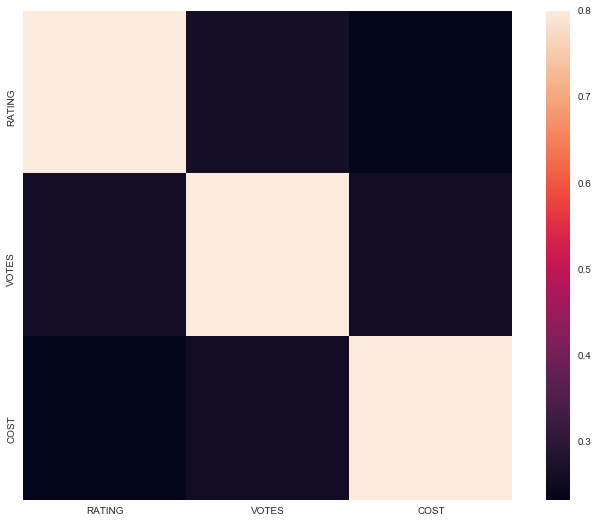

In [429]:
#correlation matrix
corrmat = raw_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

In [430]:
raw_data.corr()

,RATING,VOTES,COST
RATING,1.000000,0.261238,0.232358
VOTES,0.261238,1.000000,0.257231
COST,0.232358,0.257231,1.000000


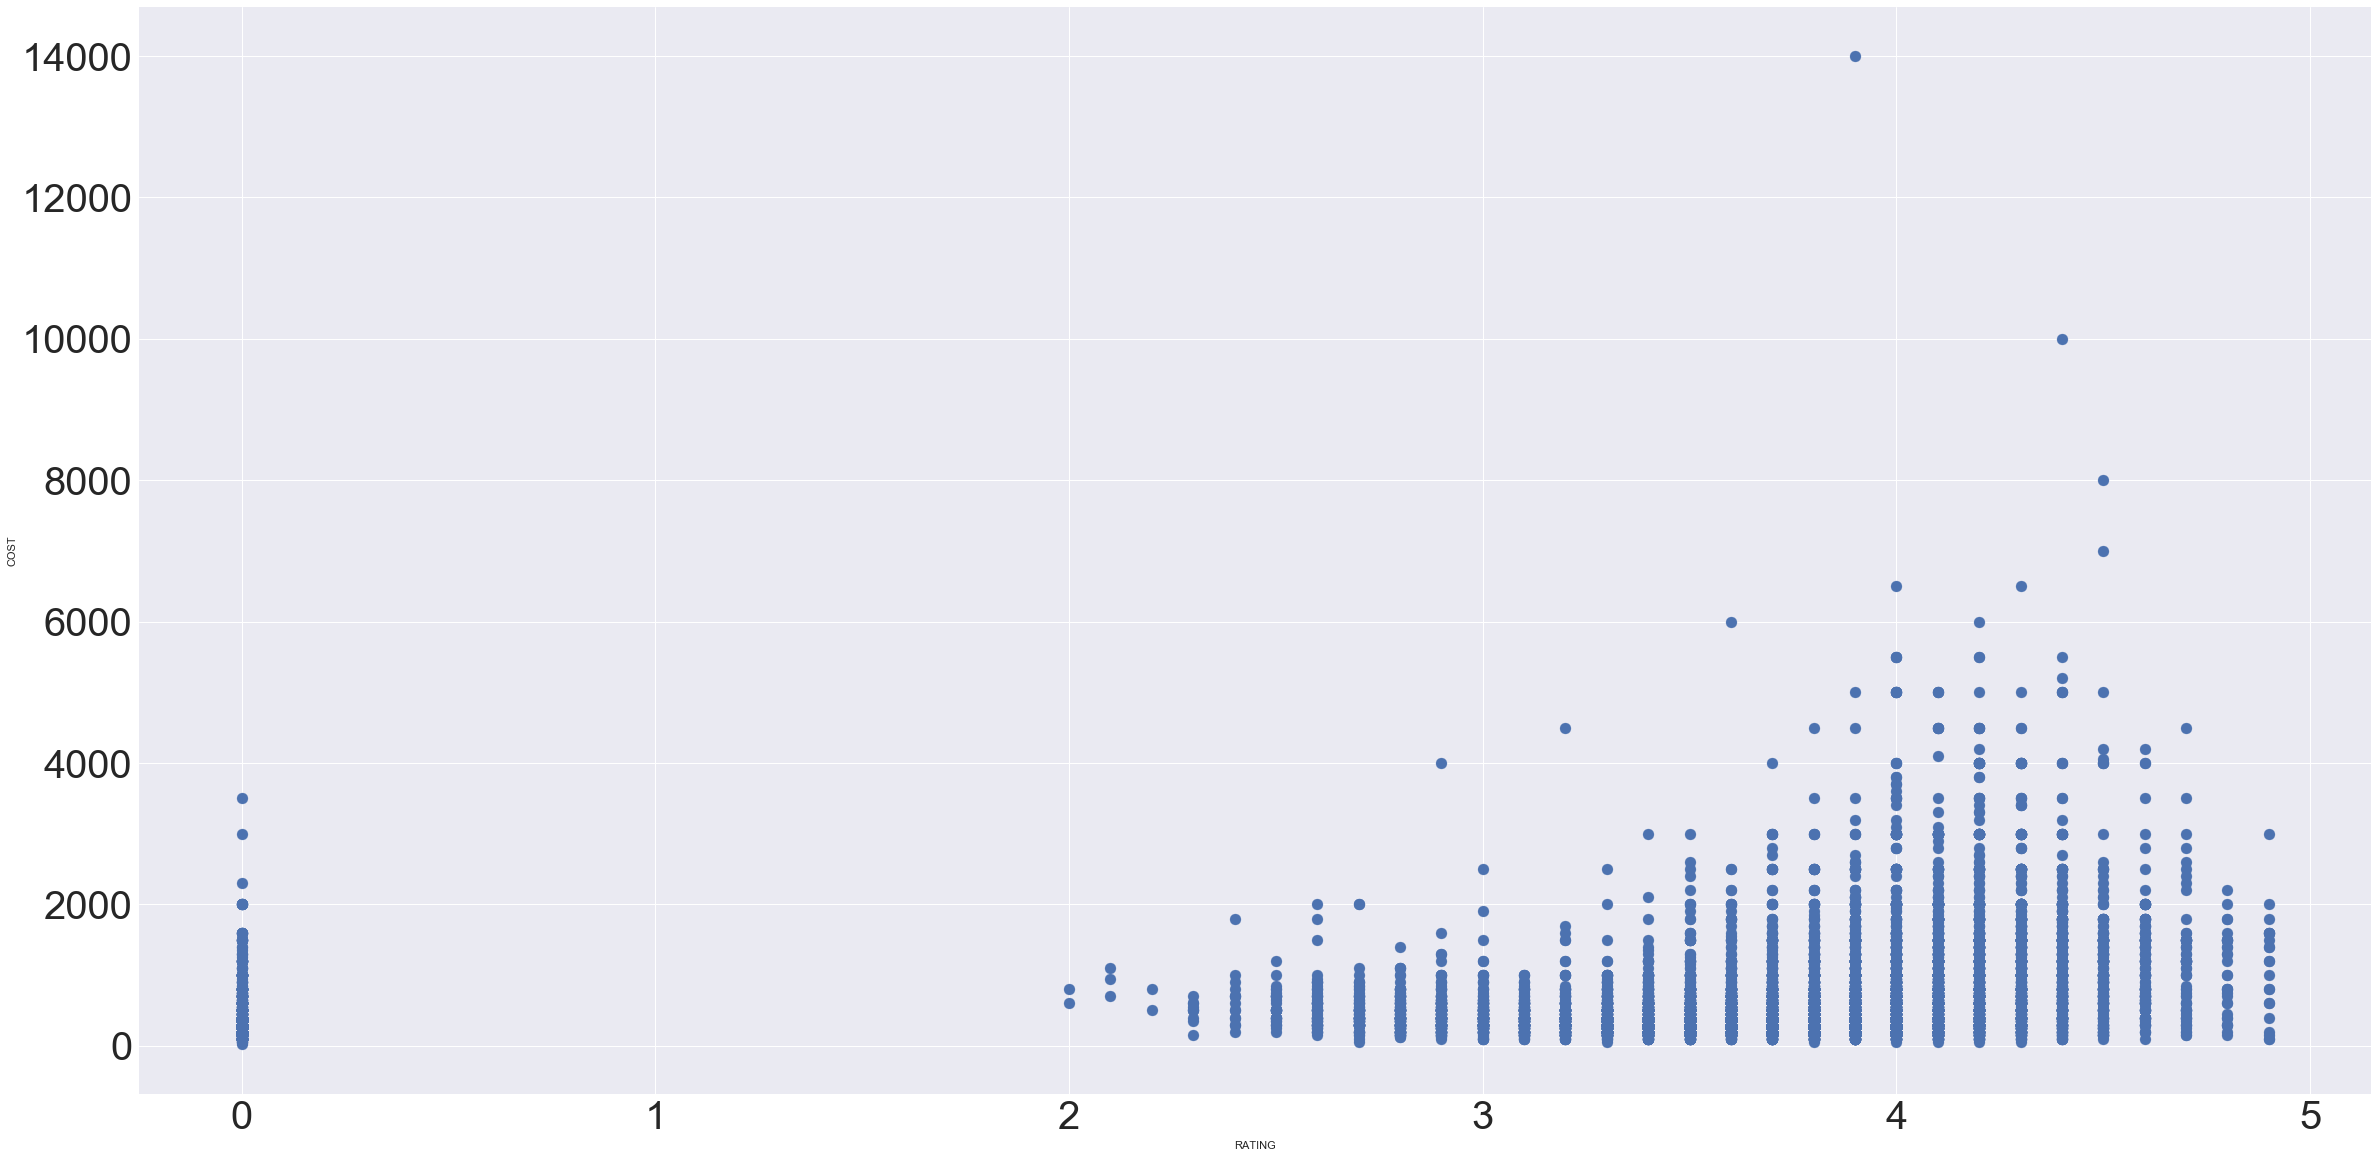

In [431]:
#scatter plot experince/saleprice

var = 'RATING'
data = pd.concat([raw_data['COST'], raw_data[var]], axis=1)
#plt.figure(figsize=(40,20))
#plt.xlabel('xlabel', fontsize=50)
#plt.ylabel('ylabel', fontsize=50)
data.plot.scatter(x=var, y='COST', figsize = (40,20), s=120,grid=True,fontsize=40,);
plt.show()

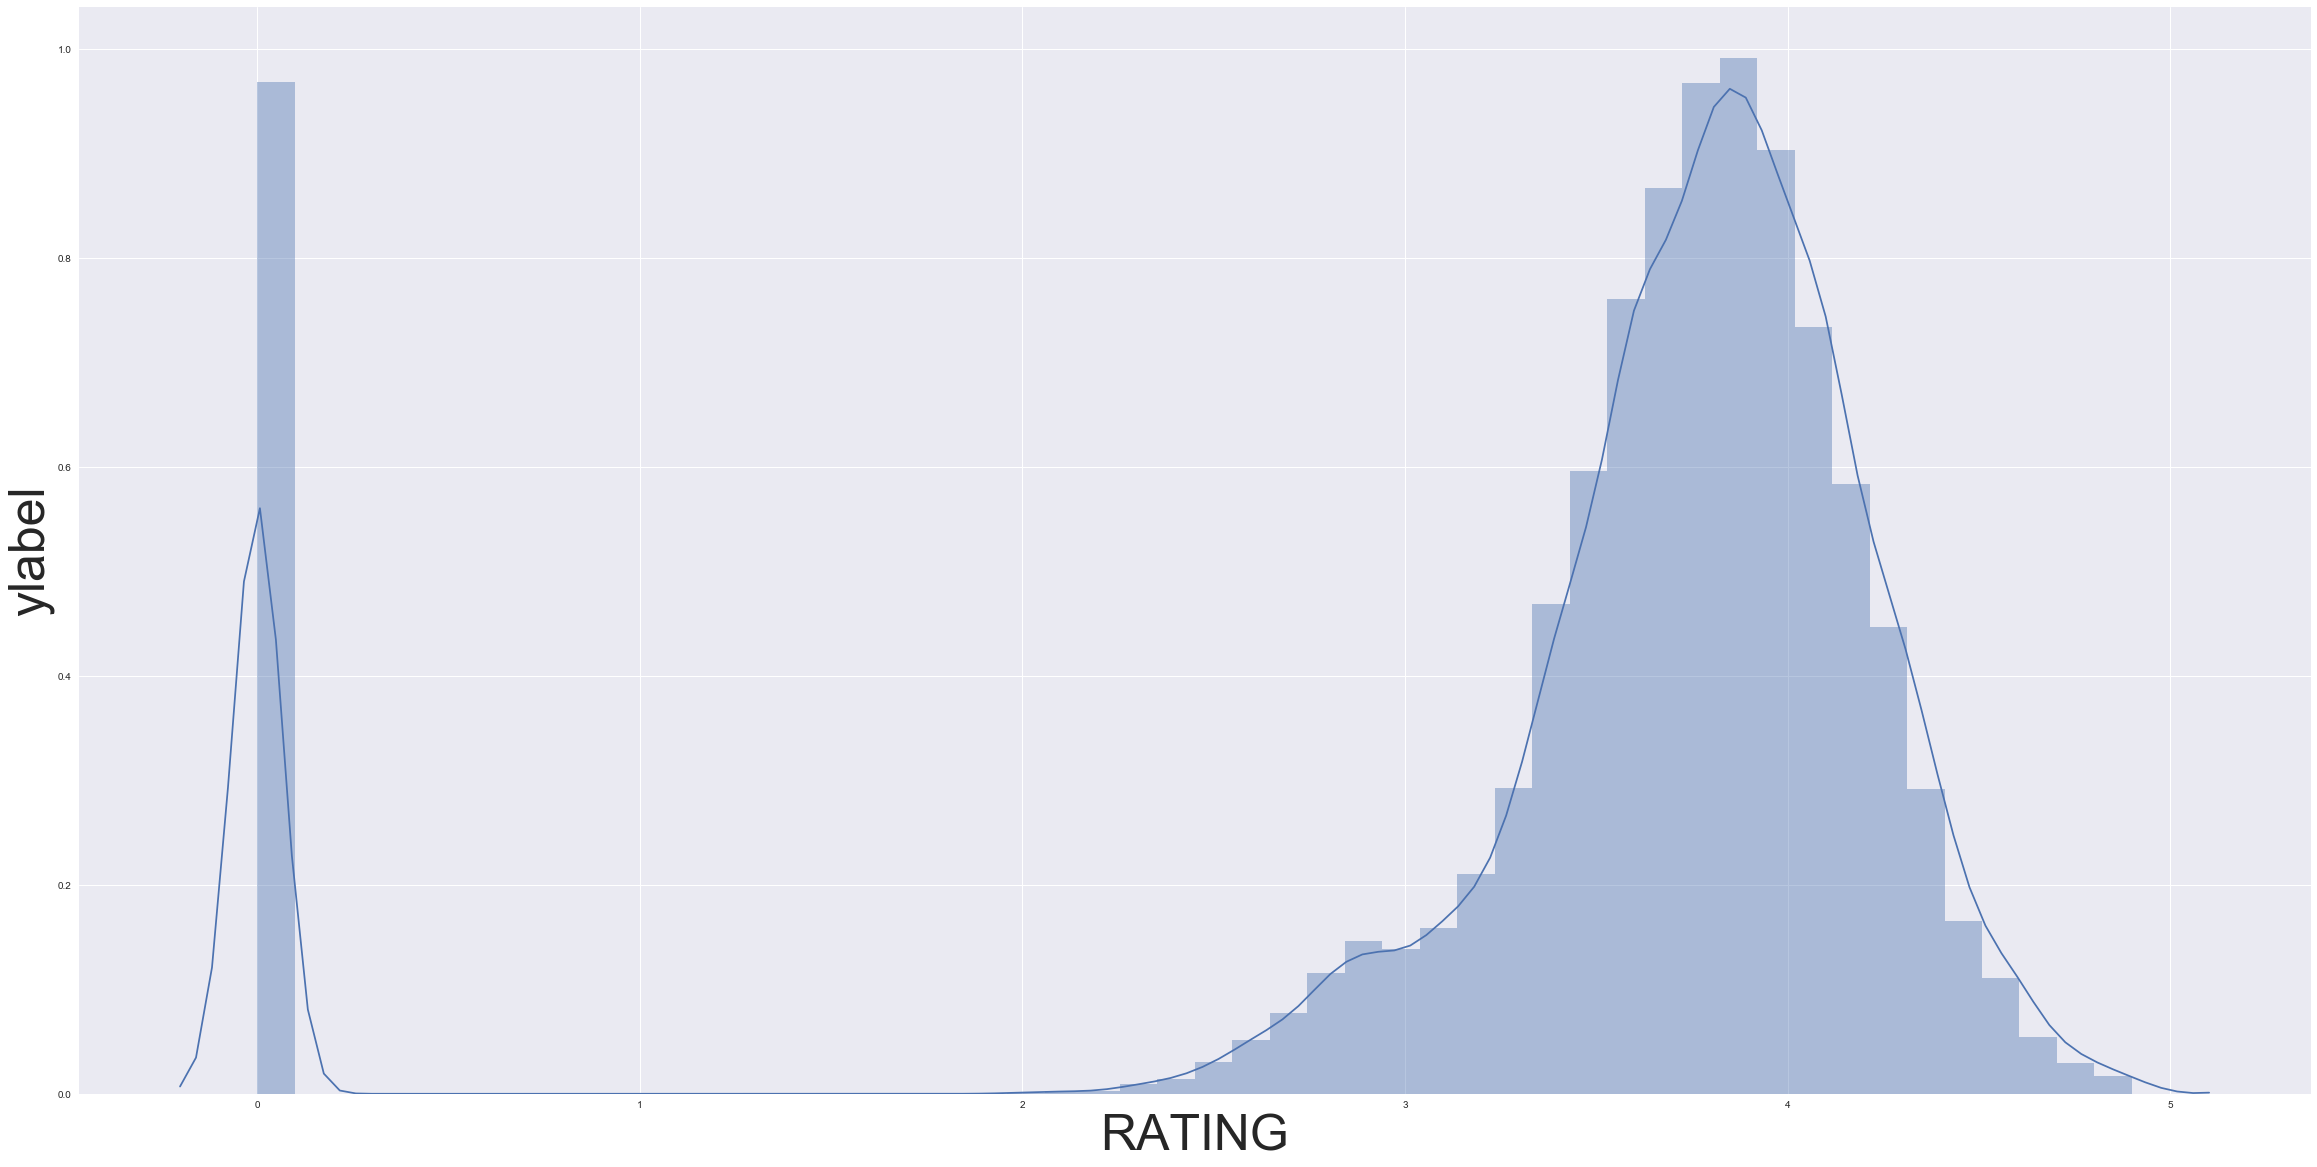

In [432]:
plt.figure(figsize=(40,20))
plt.xlabel('xlabel', fontsize=50)
plt.ylabel('ylabel', fontsize=50)
sns.distplot(raw_data["RATING"])
plt.show()

In [433]:
raw_data['RATING'].describe()

count    16921.000000
mean         3.425282
std          1.180607
min          0.000000
25%          3.400000
50%          3.800000
75%          4.000000
max          4.900000
Name: RATING, dtype: float64

In [434]:
raw_data['VOTES'].describe()

count    16921.000000
mean       379.407836
std        808.451565
min          0.000000
25%         40.000000
50%        133.000000
75%        409.000000
max      41186.000000
Name: VOTES, dtype: float64

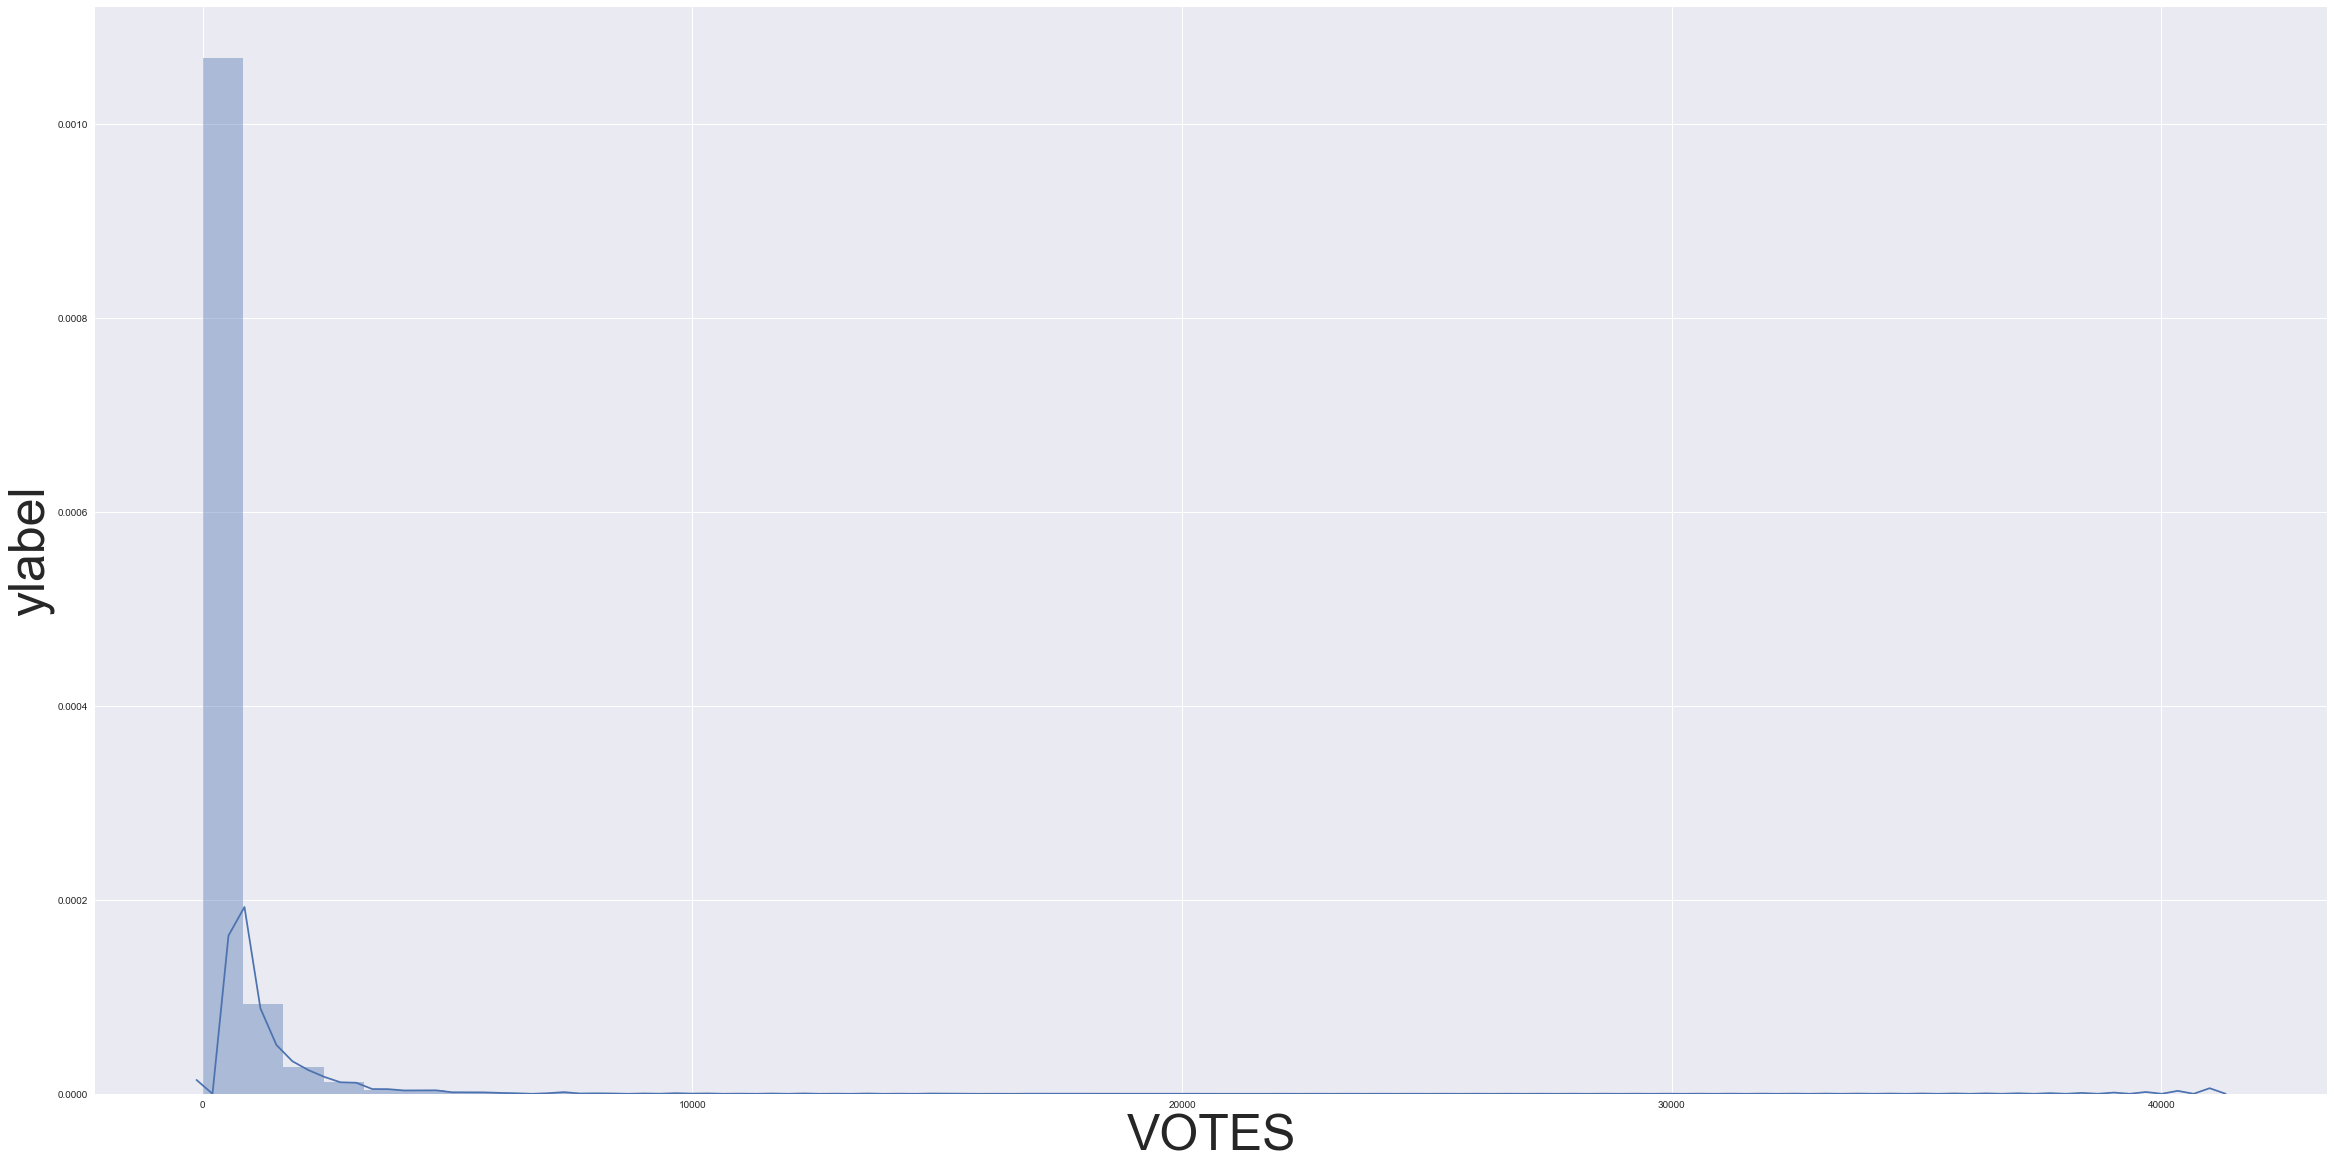

In [435]:
plt.figure(figsize=(40,20))
plt.xlabel('xlabel', fontsize=50)
plt.ylabel('ylabel', fontsize=50)
sns.distplot(raw_data["VOTES"])
plt.show()

In [436]:
raw_data.isnull().sum()

CITY             0
LOCALITY         0
RATING           0
VOTES            0
source           0
TITLE_1          0
TITLE_2          0
CUISINES_1       0
CUISINES_2       0
CUISINES_3       0
CUISINES_4       0
CUISINES_5       0
CUISINES_6       0
CUISINES_7       0
CUISINES_8       0
COST          4231
dtype: int64

In [437]:
def mapping(df,col,n=25):
 print(col,n)
 vc = df[col].value_counts()
 replacements = {}
 for col, s in vc.items():
    if s[s<n].any():
        replacements[col] = 'other'
 return replacements
local = mapping(raw_data,'LOCALITY',n=40)
raw_data['LOCALITY'] = raw_data['LOCALITY'].replace(local)

LOCALITY 40


In [438]:
from sklearn.preprocessing import LabelEncoder


le_titles = LabelEncoder()
le_cuisines = LabelEncoder()
le_city = LabelEncoder()
le_locality = LabelEncoder()


le_titles.fit(all_titles)
le_cuisines.fit(all_cuisines)

le_city.fit(raw_data['CITY'])
le_locality.fit(raw_data['LOCALITY'])

LabelEncoder()

In [439]:
raw_data['TITLE_1']=raw_data['TITLE_1'].str.upper()
raw_data['TITLE_2']=raw_data['TITLE_2'].str.upper()

In [440]:
for i in cus_list:
    raw_data[i] = raw_data[i].str.upper()
    raw_data[i] = raw_data[i].str.strip()

In [441]:
raw_data['TITLE_1'] = le_titles.transform(raw_data['TITLE_1'])
raw_data['TITLE_2'] = le_titles.transform(raw_data['TITLE_2'])


raw_data['CUISINES_1'] = le_cuisines.transform(raw_data['CUISINES_1'])
raw_data['CUISINES_2'] = le_cuisines.transform(raw_data['CUISINES_2'])
raw_data['CUISINES_3'] = le_cuisines.transform(raw_data['CUISINES_3'])
raw_data['CUISINES_4'] = le_cuisines.transform(raw_data['CUISINES_4'])
raw_data['CUISINES_5'] = le_cuisines.transform(raw_data['CUISINES_5'])
raw_data['CUISINES_6'] = le_cuisines.transform(raw_data['CUISINES_6'])
raw_data['CUISINES_7'] = le_cuisines.transform(raw_data['CUISINES_7'])
raw_data['CUISINES_8'] = le_cuisines.transform(raw_data['CUISINES_8'])


raw_data['CITY'] = le_city.transform(raw_data['CITY'])
raw_data['LOCALITY'] = le_locality.transform(raw_data['LOCALITY'])

In [442]:
raw_data.head(5)

,CITY,LOCALITY,RATING,VOTES,source,TITLE_1,TITLE_2,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,CUISINES_5,CUISINES_6,CUISINES_7,CUISINES_8,COST
0,401,108,3.6,49,train,5,20,74,47,92,88,88,88,88,88,1200.0
1,75,87,4.2,30,train,5,1,7,82,62,88,88,88,88,88,1500.0
2,75,108,3.8,221,train,5,20,92,29,17,55,88,88,88,88,800.0
3,277,11,4.1,24,train,23,20,126,29,88,88,88,88,88,88,800.0
4,277,61,3.8,165,train,9,20,34,88,88,88,88,88,88,88,300.0


In [443]:
le_cuisines.inverse_transform([88])

array(['NAA'], dtype='<U17')

In [444]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
raw_data['VOTES']= sc.fit_transform(raw_data['VOTES'].reshape(len(raw_data['VOTES']),1))
raw_data['RATING']= sc.fit_transform(raw_data['RATING'].reshape(len(raw_data['RATING']),1))

In [445]:
raw_data.head(5)

,CITY,LOCALITY,RATING,VOTES,source,TITLE_1,TITLE_2,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,CUISINES_5,CUISINES_6,CUISINES_7,CUISINES_8,COST
0,401,108,0.147994,-0.408704,train,5,20,74,47,92,88,88,88,88,88,1200.0
1,75,87,0.656222,-0.432207,train,5,1,7,82,62,88,88,88,88,88,1500.0
2,75,108,0.317404,-0.195946,train,5,20,92,29,17,55,88,88,88,88,800.0
3,277,11,0.571518,-0.439628,train,23,20,126,29,88,88,88,88,88,88,800.0
4,277,61,0.317404,-0.265216,train,9,20,34,88,88,88,88,88,88,88,300.0


In [446]:
raw_data.drop(["CUISINES_6","CUISINES_7","CUISINES_8"], axis=1,inplace=True)

In [447]:
raw_data.head(5)

,CITY,LOCALITY,RATING,VOTES,source,TITLE_1,TITLE_2,CUISINES_1,CUISINES_2,CUISINES_3,CUISINES_4,CUISINES_5,COST
0,401,108,0.147994,-0.408704,train,5,20,74,47,92,88,88,1200.0
1,75,87,0.656222,-0.432207,train,5,1,7,82,62,88,88,1500.0
2,75,108,0.317404,-0.195946,train,5,20,92,29,17,55,88,800.0
3,277,11,0.571518,-0.439628,train,23,20,126,29,88,88,88,800.0
4,277,61,0.317404,-0.265216,train,9,20,34,88,88,88,88,300.0


In [448]:
#Divide into test and train:
train = raw_data.loc[raw_data['source']=="train"]
test = raw_data.loc[raw_data['source']=="test"]
train.drop(["source"], inplace=True, axis=1)
test.drop(["source","COST"], inplace=True, axis=1)

In [449]:
train['COST'] = np.log(train['COST'])

In [450]:
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
import xgboost
import numpy as np
from sklearn.ensemble import RandomForestRegressor
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(train.drop(["COST"], axis=1), train['COST'])

In [352]:
from sklearn.grid_search import GridSearchCV

In [353]:
RF_G= param_grid={
            'max_depth': [4,8,10,12,14,16],
            'n_estimators': [10,20,30,40,50],
            'min_samples_split': [2, 5, 10]
        },

In [354]:
gsearchRF1 = GridSearchCV(estimator = RandomForestRegressor(),param_grid=RF_G,scoring='neg_mean_squared_log_error')


In [355]:
gsearchRF1.fit(train_x,train_y)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=({'max_depth': [4, 8, 10, 12, 14, 16], 'n_estimators': [10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10]},),
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_log_error', verbose=0)

In [356]:
gsearchRF1.best_params_

{'max_depth': 14, 'min_samples_split': 10, 'n_estimators': 50}

In [ ]:
RF_G_2 = param_grid={
            'max_depth': [12],
            'n_estimators': [40,50,60],
            'min_samples_split': [10,12,15,19,24]
        },

In [ ]:
gsearchRF2 = GridSearchCV(estimator = RandomForestRegressor(),param_grid=RF_G_2,scoring='neg_mean_squared_log_error')


In [ ]:
gsearchRF2.fit(train_x,train_y)

In [ ]:
gsearchRF2.best_params_

In [451]:
RF1 = RandomForestRegressor(max_depth=14, min_samples_split=10, n_estimators=50, n_jobs=-1)

In [452]:
RF1.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [453]:
RF1.score(valid_x,valid_y)

0.7231748183605428

In [ ]:
sub1 = np.exp(RF1.predict(test))

In [ ]:
pd.DataFrame(sub1).to_excel("./subimission_01.xlsx")

In [74]:
import xgboost

In [ ]:
param_test1 = {'n_estimators':list(range(20,121,10))}
gsearch1 = GridSearchCV(estimator = xgboost.XGBRegressor(learning_rate=0.1, min_samples_split=100,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='neg_mean_squared_log_error',n_jobs=4,iid=False, cv=5)
%time gsearch1.fit(train_x,train_y)

In [ ]:
gsearch1.best_params_

In [ ]:
param_test2 = {'max_depth':list(range(5,16,2))}
gsearch2 = GridSearchCV(estimator = xgboost.XGBRegressor(learning_rate=0.1, n_estimators=120, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='neg_mean_squared_log_error',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train_x,train_y)
#print(gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_)

In [ ]:
gsearch2.best_params_

In [ ]:
param_test3 = {'min_child_weight':[1,2,3,4]}
gsearch3 = GridSearchCV(estimator = xgboost.XGBRegressor(learning_rate=0.1, n_estimators=120, max_features='sqrt', subsample=0.8, random_state=10,max_depth=7), 
param_grid = param_test3, scoring='neg_mean_squared_log_error',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train_x,train_y)
#print(gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_)

In [ ]:
gsearch3.best_params_

In [ ]:
param_test4 = {'gamma':[i/10.0 for i in range(1,10)]}
gsearch4 = GridSearchCV(estimator = xgboost.XGBRegressor(learning_rate=0.1, n_estimators=120, max_features='sqrt', subsample=0.8, random_state=10,max_depth=7, min_child_weight=3), 
param_grid = param_test4, scoring='neg_mean_squared_log_error',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train_x,train_y)

In [ ]:
gsearch4.best_params_

In [454]:
xg_algo = xgboost.XGBRegressor(n_estimators=120, max_depth=7, min_child_weight=3,
                              gamma=0.6)

In [455]:
xg_algo.fit(train_x,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.6, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=3, missing=None, n_estimators=120,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [456]:
xg_algo.score(valid_x,valid_y)

0.7383549898108236

In [121]:
sub9 = np.exp(xg_algo.predict(test))
pd.DataFrame(sub9).to_excel("./subimission_09.xlsx")

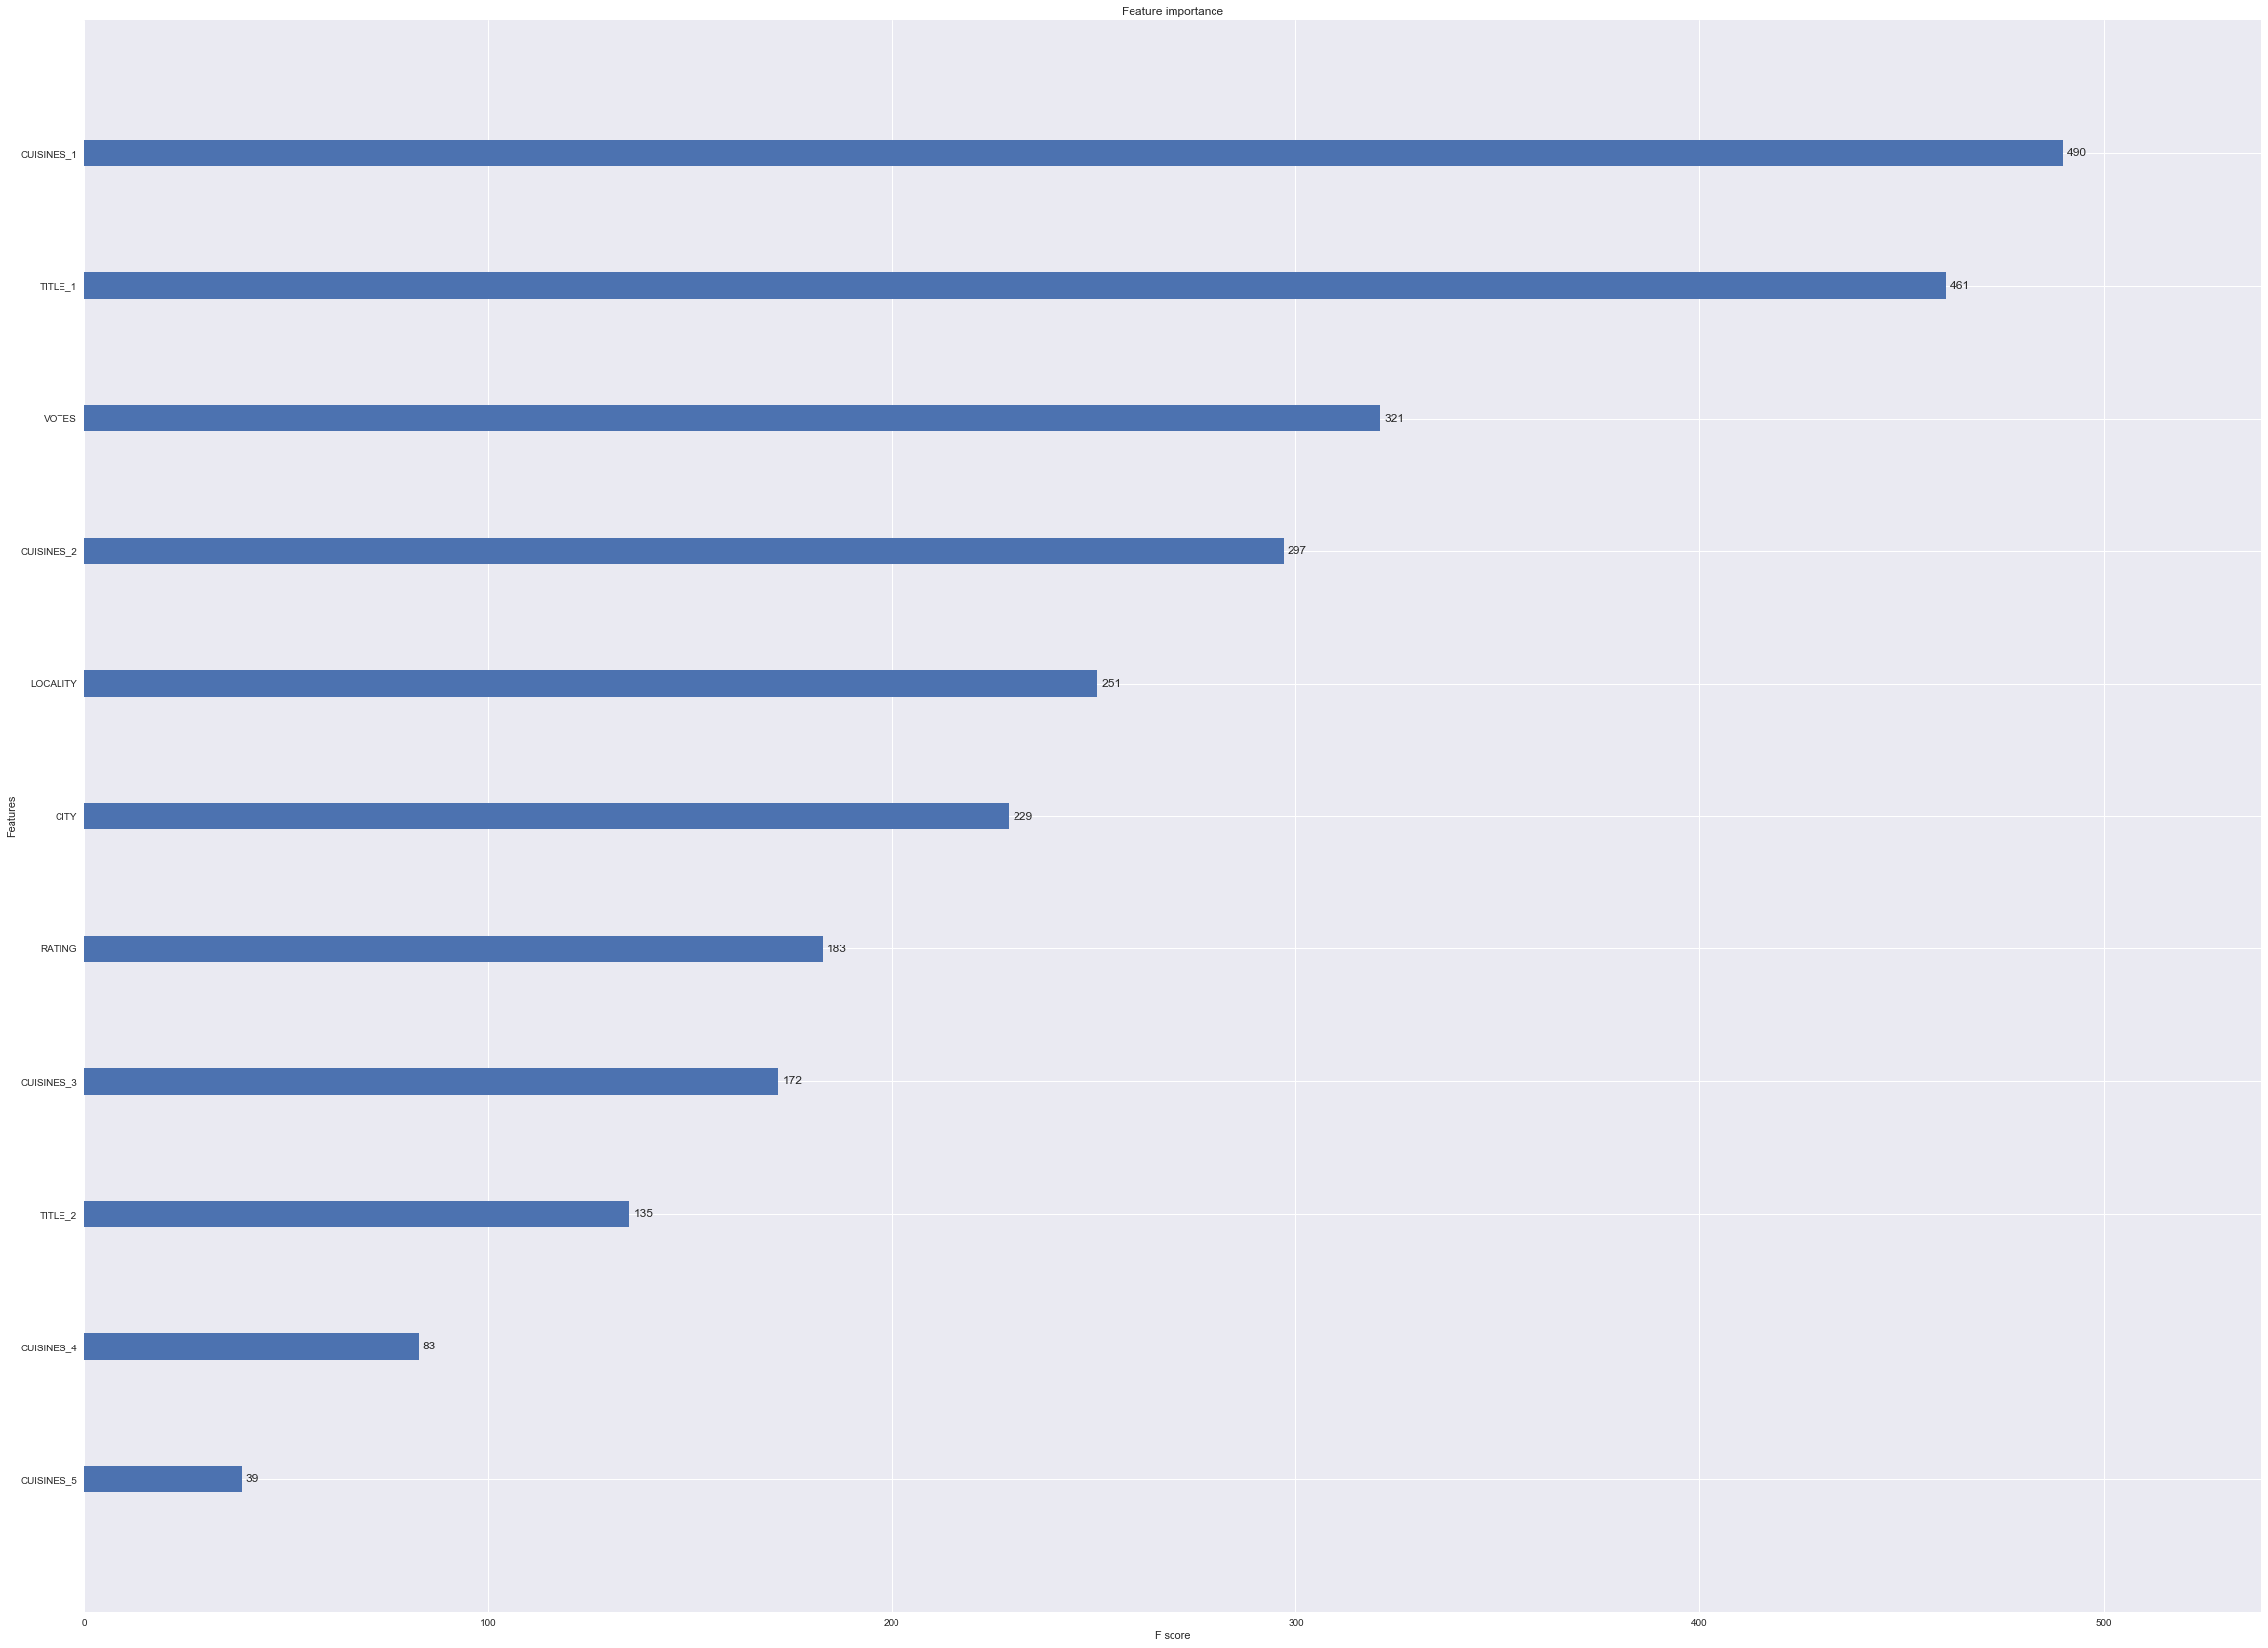

In [363]:
xgboost.plot_importance(xg_algo)
plt.figure(figsize=(40,20))
#plt.xlabel(fontsize=50)
#plt.ylabel(fontsize=50)
plt.show()

In [ ]:
sub2 = np.exp(xg_algo.predict(test))
pd.DataFrame(sub2).to_excel("./subimission_02.xlsx")

In [ ]:
sub1

In [ ]:
sub2

In [466]:
param_test5 = {'n_estimators':list(range(120,180,10)),
              'max_depth':list(range(5,16,2)),
              'min_child_weight':[1,2,3,4],
              'gamma':[i/10.0 for i in range(1,10)]}

In [467]:
gsearch5 = GridSearchCV(estimator = xgboost.XGBRegressor(learning_rate=0.1, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test5, scoring='neg_mean_squared_log_error',n_jobs=-1,iid=False, cv=5)
gsearch5.fit(train_x,train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, max_features='sqrt', min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=10, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=-1,
       param_grid={'n_estimators': [120, 130, 140, 150, 160, 170], 'max_depth': [5, 7, 9, 11, 13, 15], 'min_child_weight': [1, 2, 3, 4], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_log_error', verbose=0)

In [ ]:
gsearch5.best_params_

In [457]:
xg_boost2 = xgboost.XGBRegressor(max_depth=11, gamma=0.6,min_child_weight=2, n_estimators=120)

In [458]:
xg_boost2.fit(train_x, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.6, learning_rate=0.1, max_delta_step=0,
       max_depth=11, min_child_weight=2, missing=None, n_estimators=120,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [459]:
xg_boost2.score(valid_x, valid_y)

0.7451003492323574

In [460]:
sub9 = np.exp(xg_boost2.predict(test))
pd.DataFrame(sub9).to_excel("./subimission_09.xlsx")

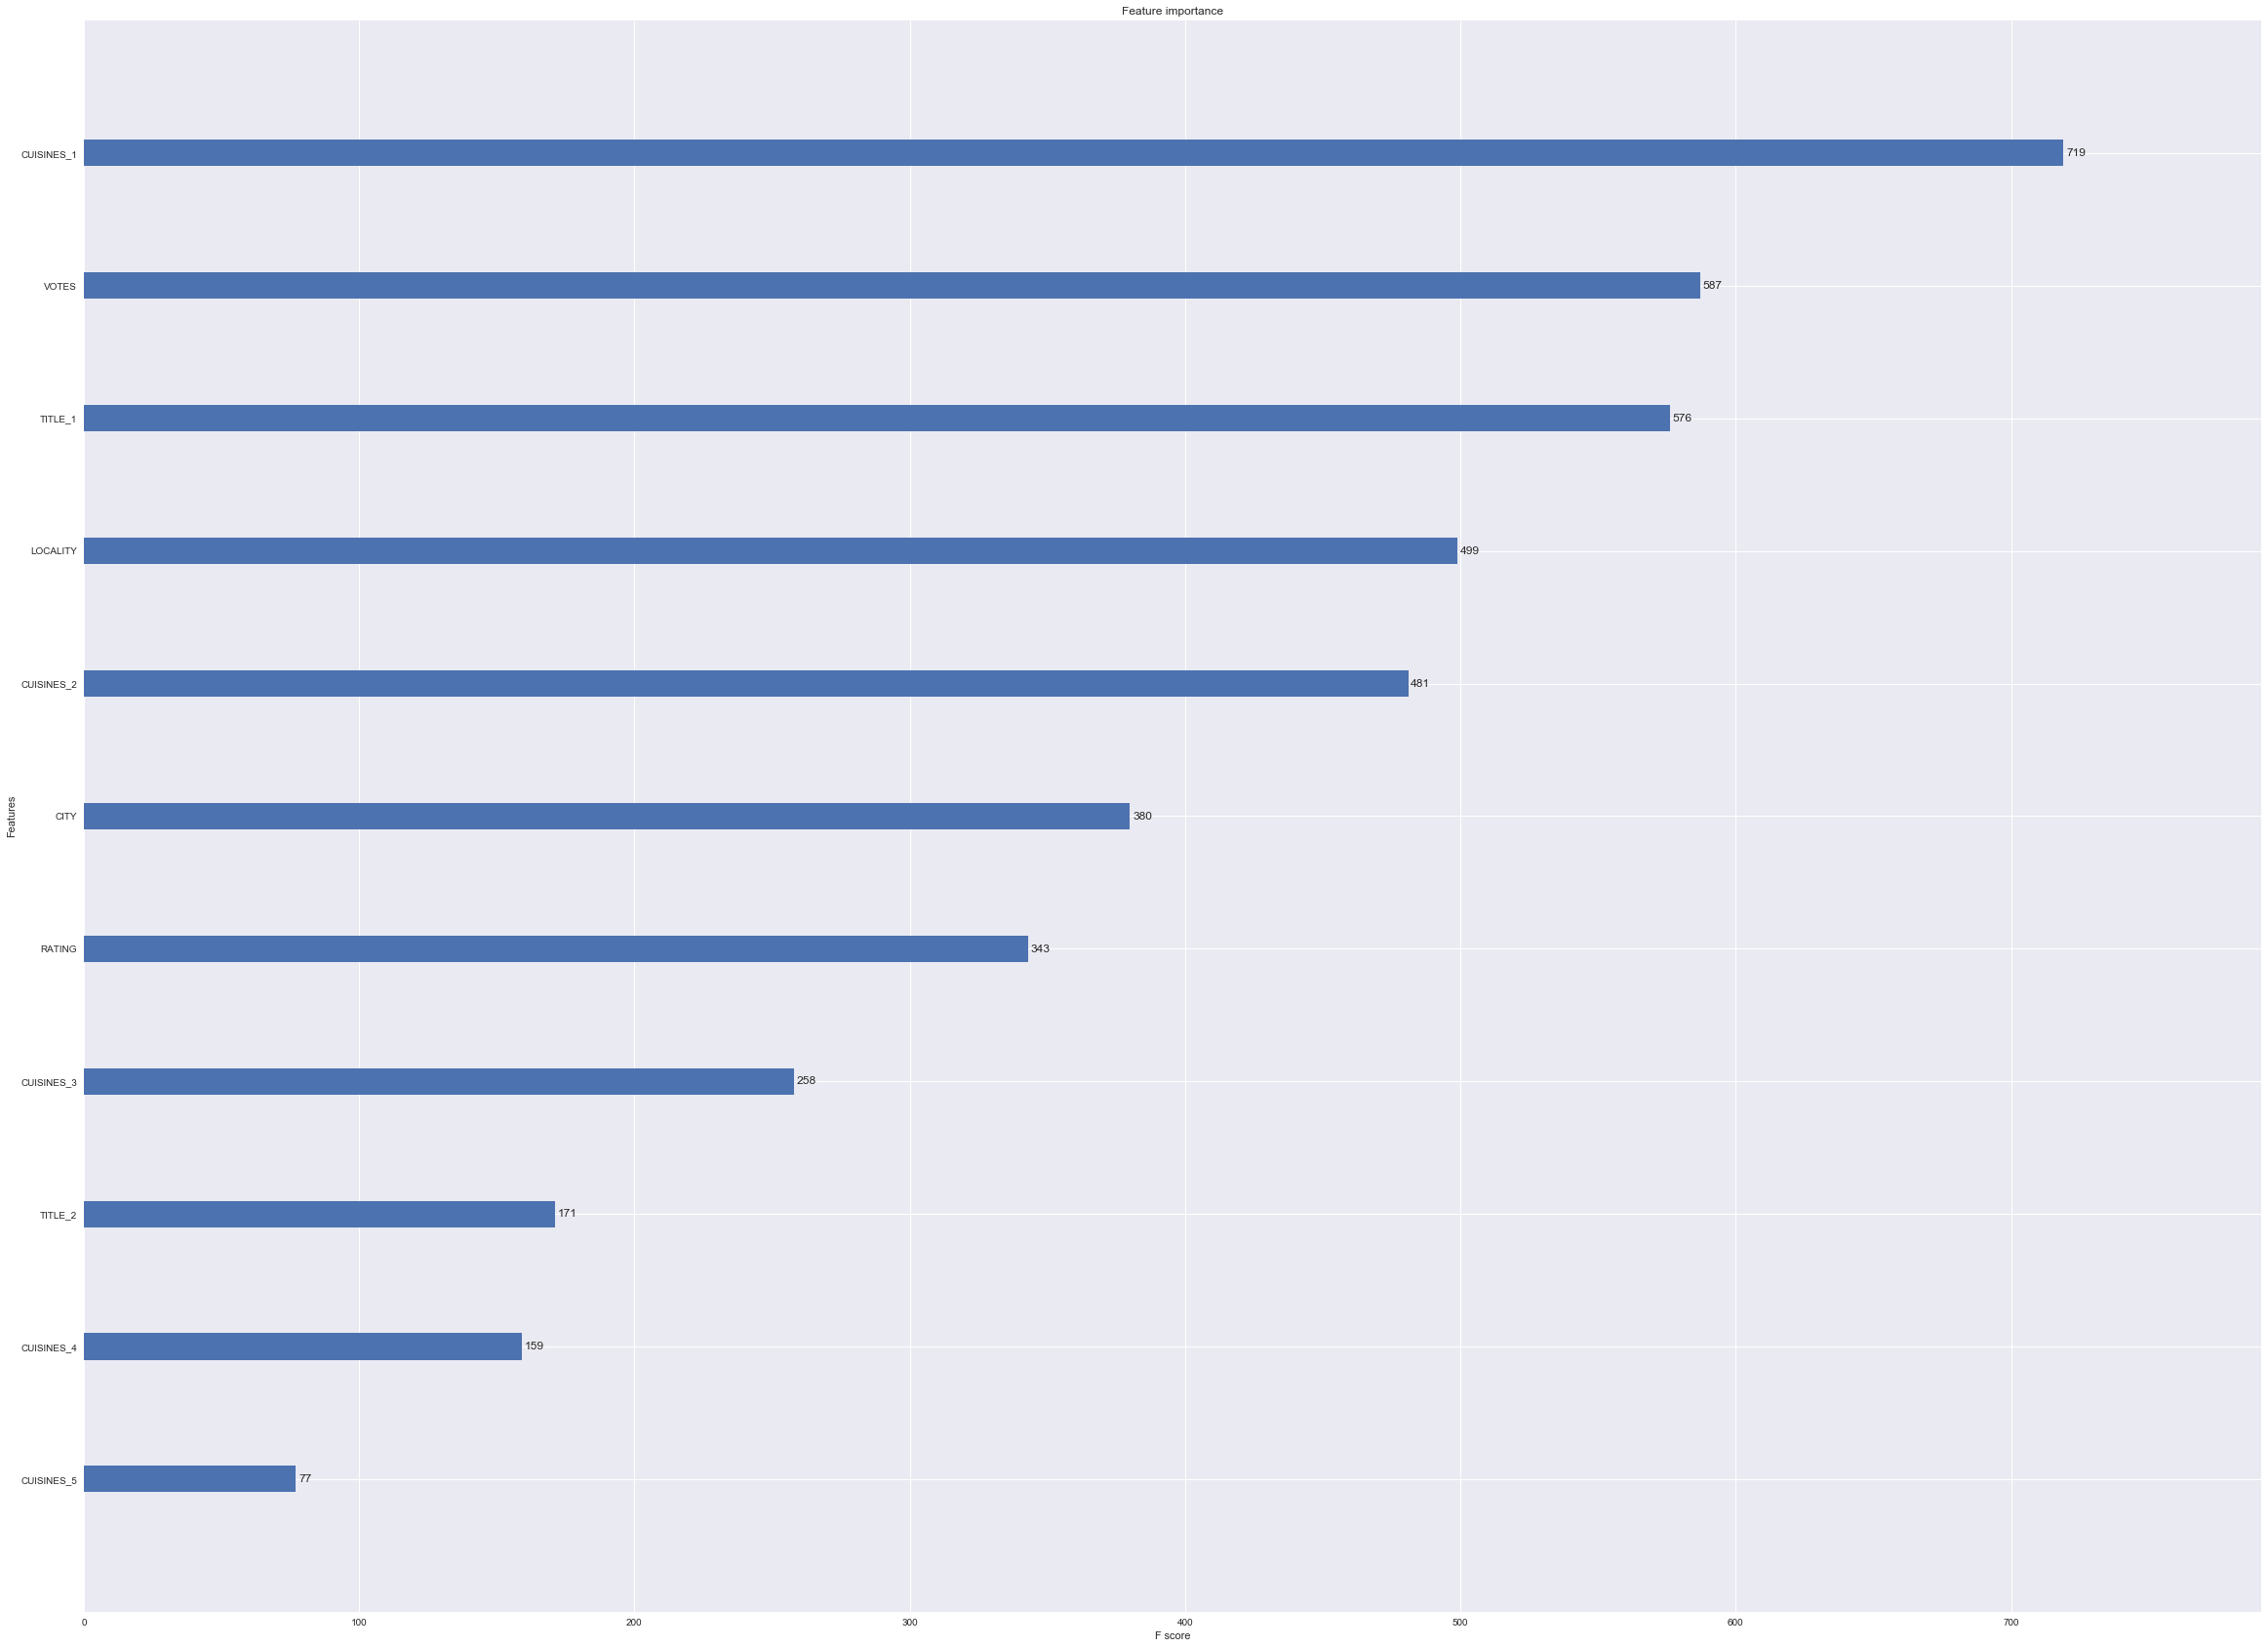

In [367]:
xgboost.plot_importance(xg_boost2)
plt.show()

In [ ]:
sub3 = (sub2 + sub4) /  2
pd.DataFrame(sub2).to_excel("./subimission_03.xlsx")

In [ ]:
sub5 = np.exp(xg_boost2.predict(test))
#pd.DataFrame(sub5).to_excel("./subimission_05.xlsx")

In [ ]:
sub5

In [461]:
from keras import layers
from keras import models
from keras.layers import Dropout
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation = 'relu', input_shape = (train_x.shape[1],)))
    model.add(Dropout(.2))
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(Dropout(.2))
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(Dropout(.2))
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(layers.Dense(1))
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])
    return model

Using TensorFlow backend.


In [464]:
NN_model = build_model()

In [465]:
NN_model.fit(train_x, train_y, epochs=30, verbose=1,validation_data=(valid_x,valid_y))

Train on 9517 samples, validate on 3173 samples
Epoch 1/30
9517/9517 [==============================] - 1s 74us/step - loss: 3.0271 - mean_squared_error: 3.0271 - val_loss: 5.9465 - val_mean_squared_error: 5.9465
Epoch 2/30
9517/9517 [==============================] - 0s 43us/step - loss: 1.4669 - mean_squared_error: 1.4669 - val_loss: 2.8785 - val_mean_squared_error: 2.8785
Epoch 3/30
9517/9517 [==============================] - 0s 43us/step - loss: 1.0886 - mean_squared_error: 1.0886 - val_loss: 2.4785 - val_mean_squared_error: 2.4785
Epoch 4/30
9517/9517 [==============================] - 0s 43us/step - loss: 0.8613 - mean_squared_error: 0.8613 - val_loss: 3.5308 - val_mean_squared_error: 3.5308
Epoch 5/30
9517/9517 [==============================] - 0s 42us/step - loss: 0.7357 - mean_squared_error: 0.7357 - val_loss: 3.0391 - val_mean_squared_error: 3.0391
Epoch 6/30
9517/9517 [==============================] - 0s 41us/step - loss: 0.6212 - mean_squared_error: 0.6212 - val_loss: 2.

In [ ]:
sub6 = np.exp(NN_model.predict(test))

In [ ]:
sub66 = (sub5 + sub6)/2
pd.DataFrame(sub66).to_excel("./sub66.xlsx")

In [6]:
import pandas as pd

In [7]:
pd.__version__

'0.24.2'